In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


In [ ]:
data = pd.read_csv("heart.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(1025, 14)

In [ ]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.sample(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
674   63    1   0       130   330    1        0      132      1      1.8   
768   46    1   1       101   197    1        1      156      0      0.0   
258   38    1   3       120   231    0        1      182      1      3.8   
132   41    1   1       135   203    0        1      132      0      0.0   
12    34    0   1       118   210    0        1      192      0      0.7   

     slope  ca  thal  target  
674      2   3     3       0  
768      2   0     3       1  
258      1   0     3       0  
132      1   0     1       1  
12       2   0     2       1

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [ ]:
y = data["target"]

target
1    526
0    499
Name: count, dtype: int64


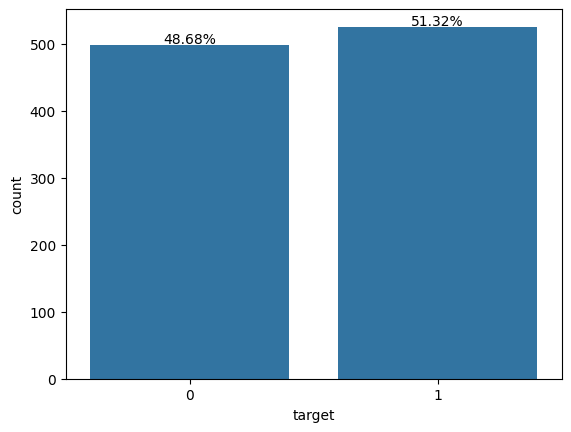

In [ ]:
ax = sns.countplot(data=data, x="target")
target_temp = data.target.value_counts()
print(target_temp)
total = target_temp.sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(height / total * 100),
            ha='center')

plt.show()

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [ ]:
data["sex"].unique()

array([1, 0])

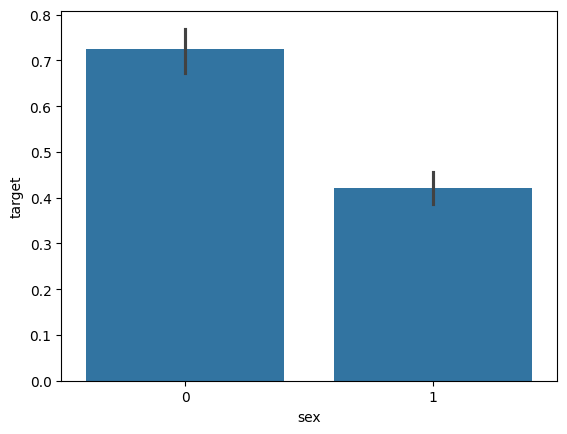

In [ ]:
ax = sns.barplot(x=data["sex"], y=data["target"])
plt.show()


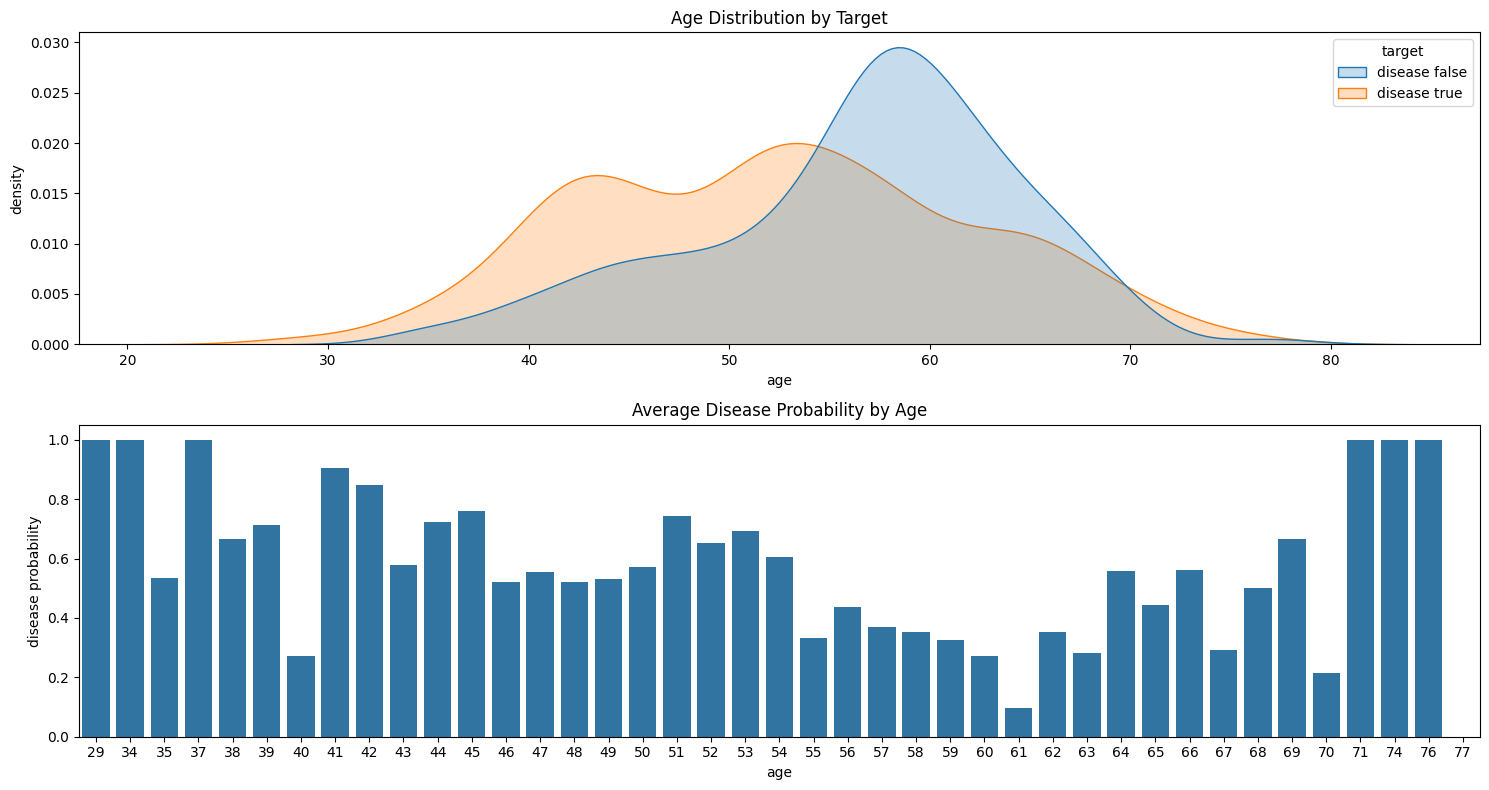

In [ ]:
def plotAge(data, axes):
    sns.kdeplot(data=data, x="age", hue="target", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']

    legend = axes[0].get_legend()
    for t, l in zip(legend.texts, legend_labels):
        t.set_text(l)
    axes[0].set(xlabel='age', ylabel='density', title='Age Distribution by Target')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability', title='Average Disease Probability by Age')

    plt.tight_layout()
    plt.show()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge(data, axes)

In [ ]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


In [ ]:
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [ ]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [ ]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

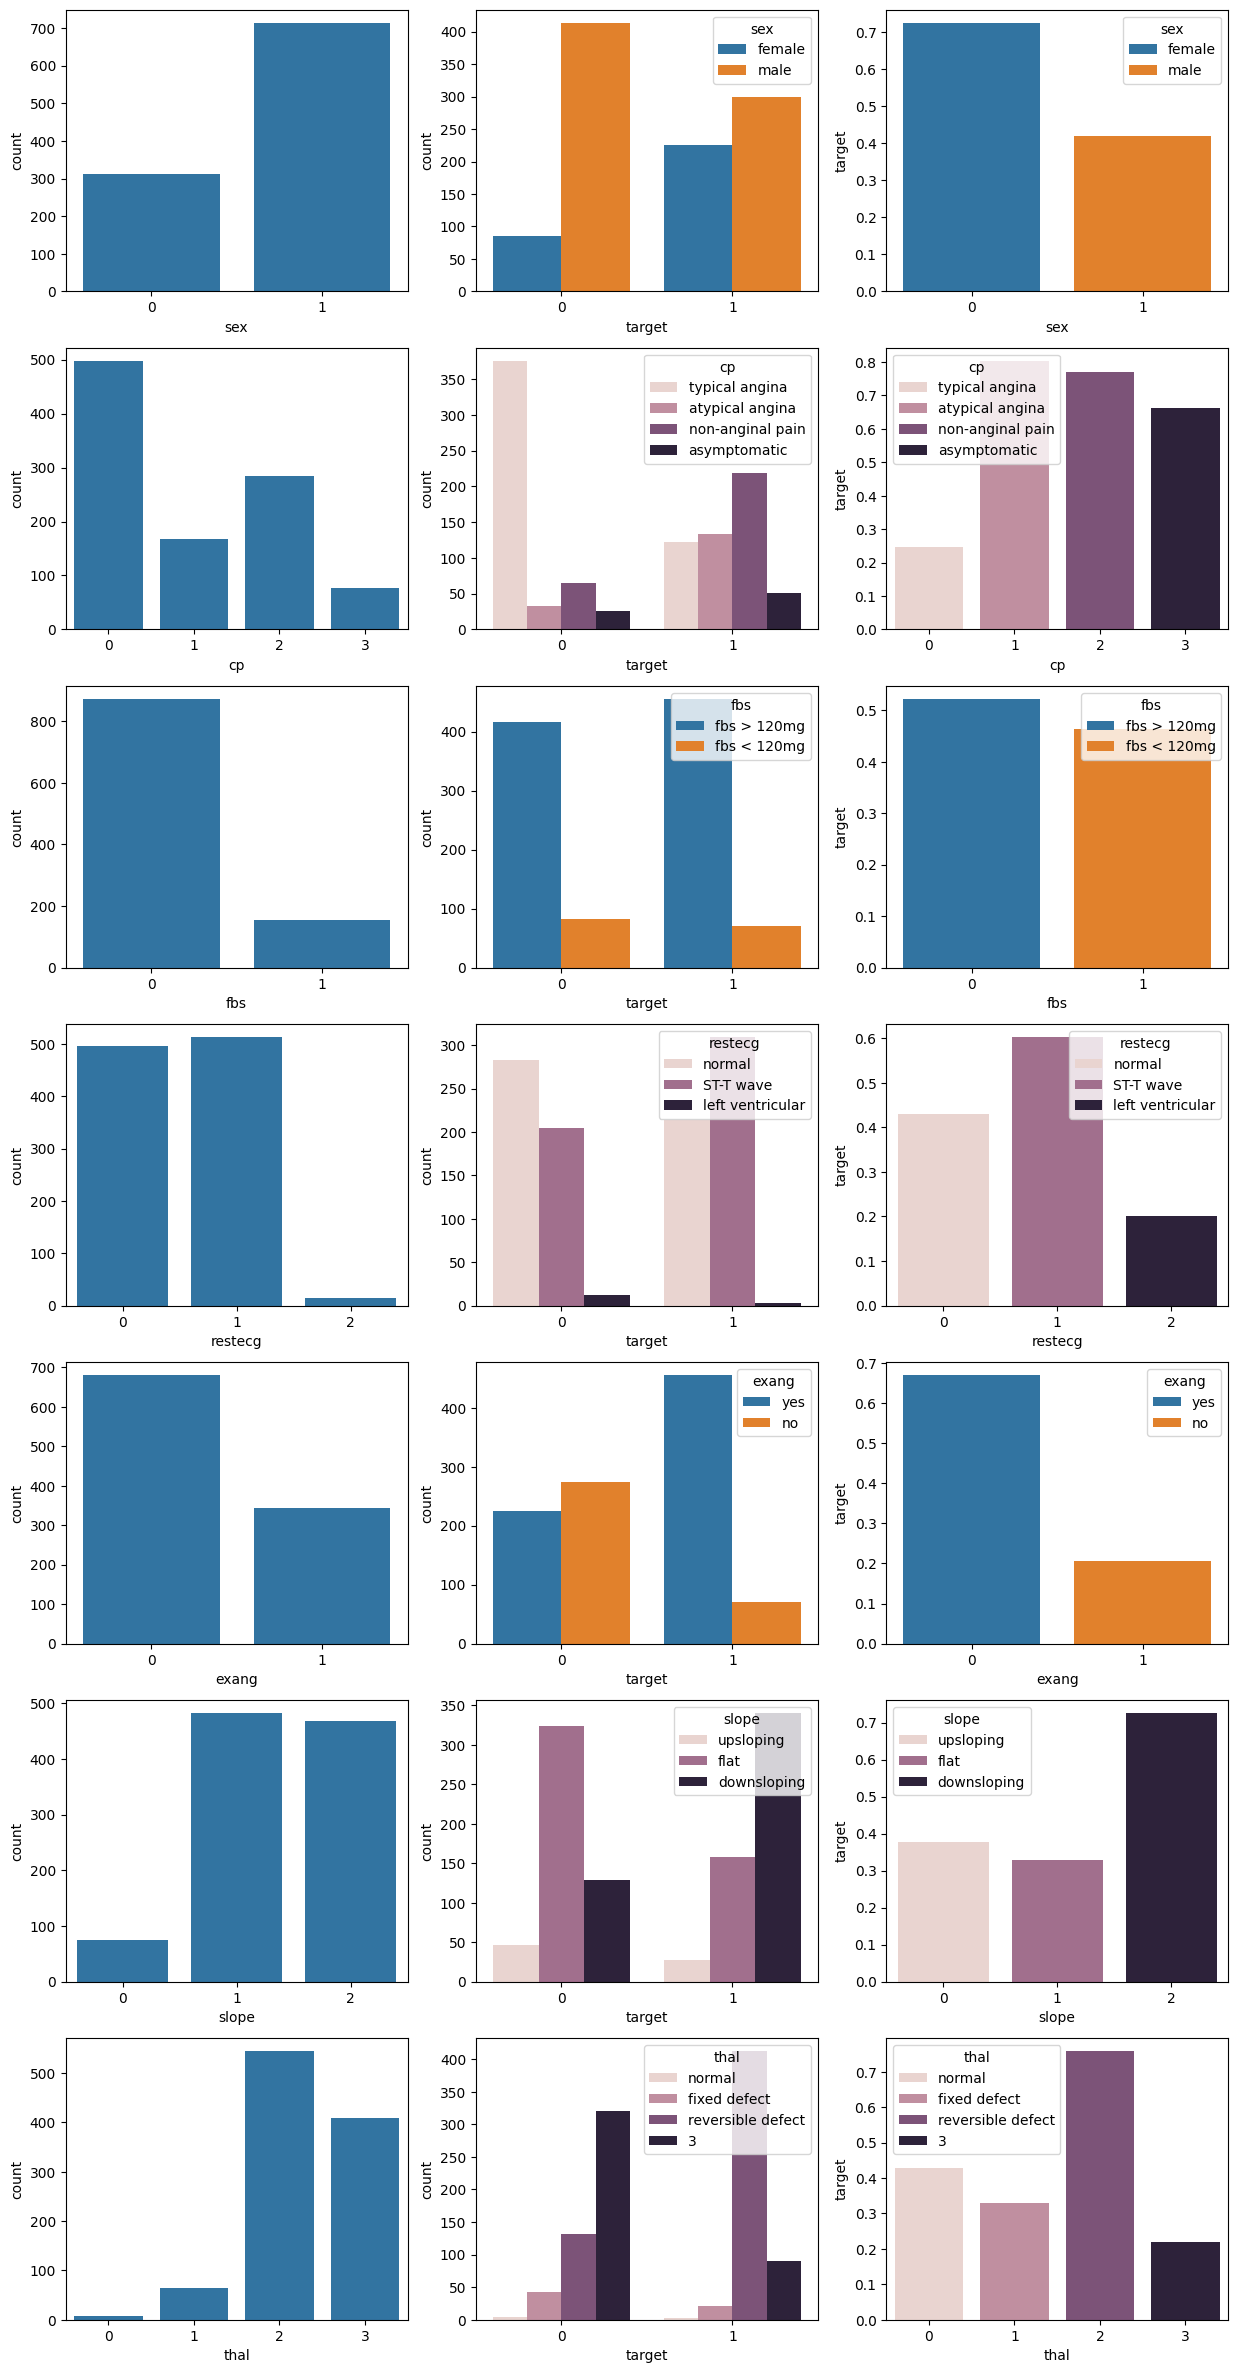

In [ ]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [ ]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalach', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]


In [ ]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])


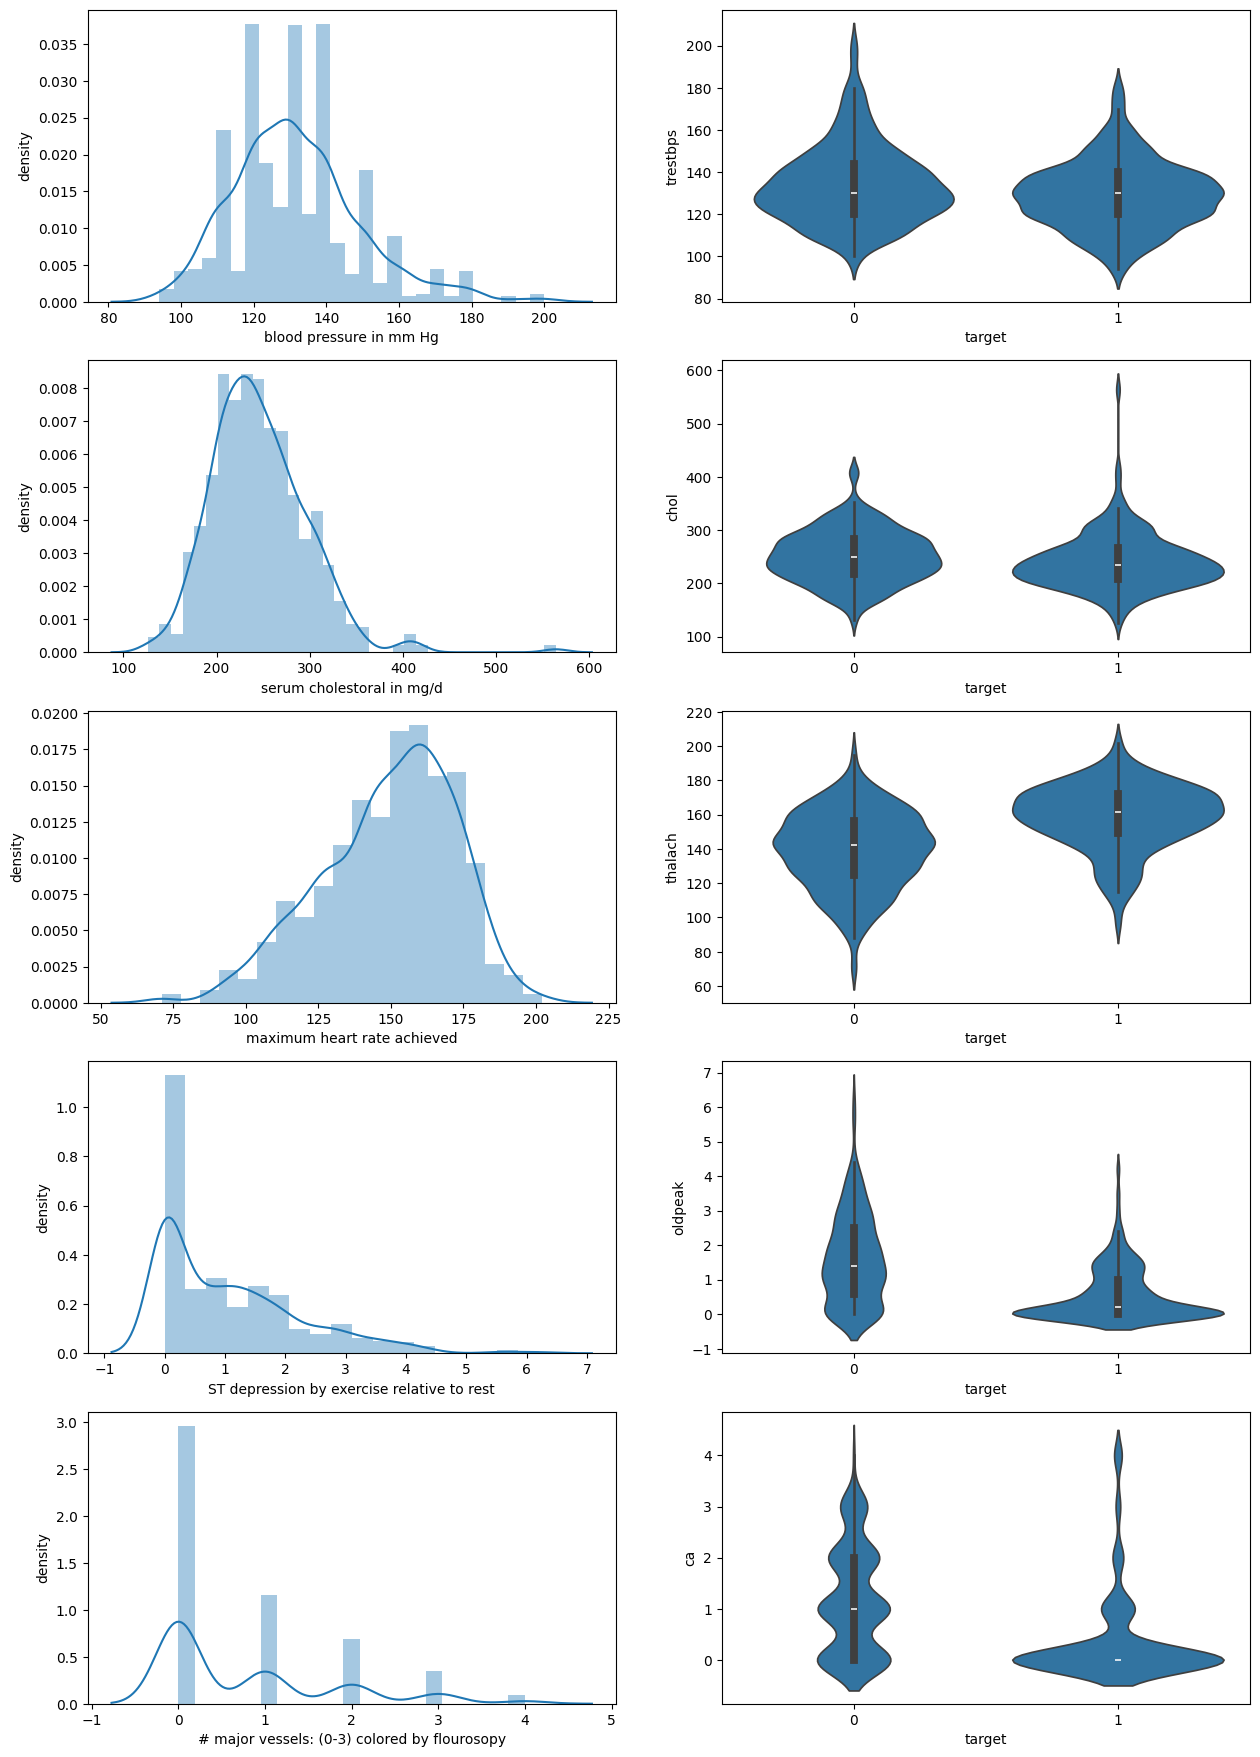

In [ ]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

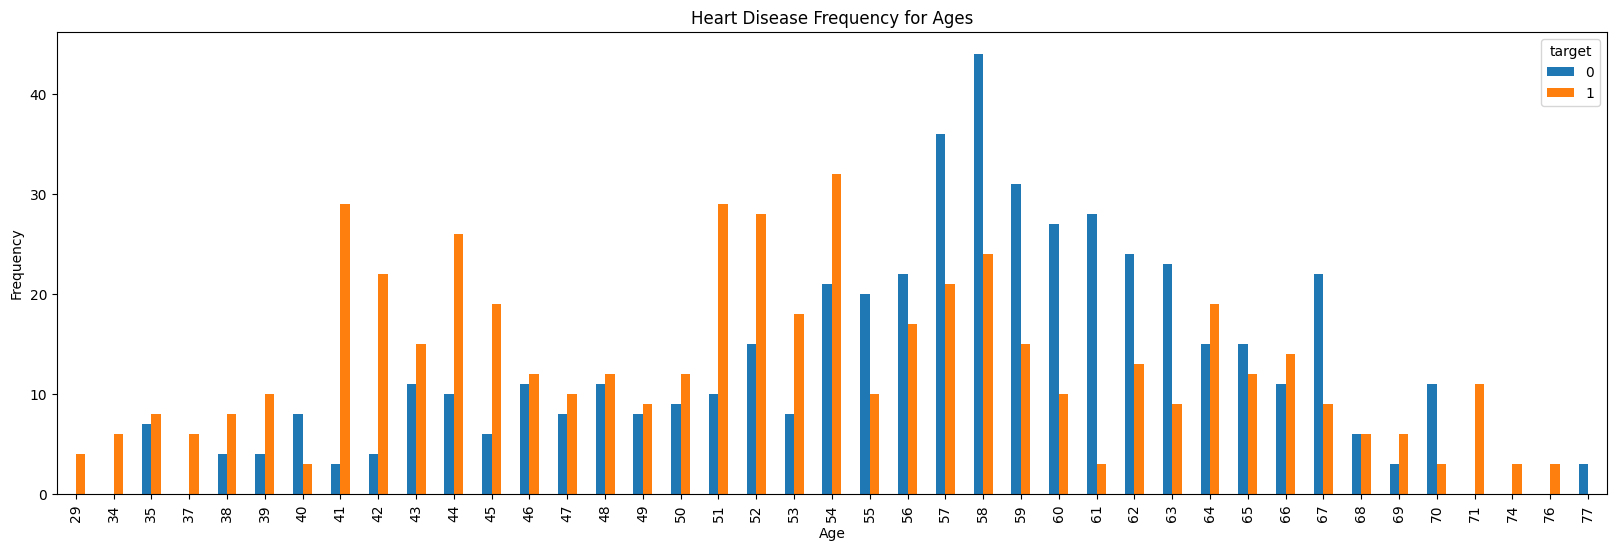

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

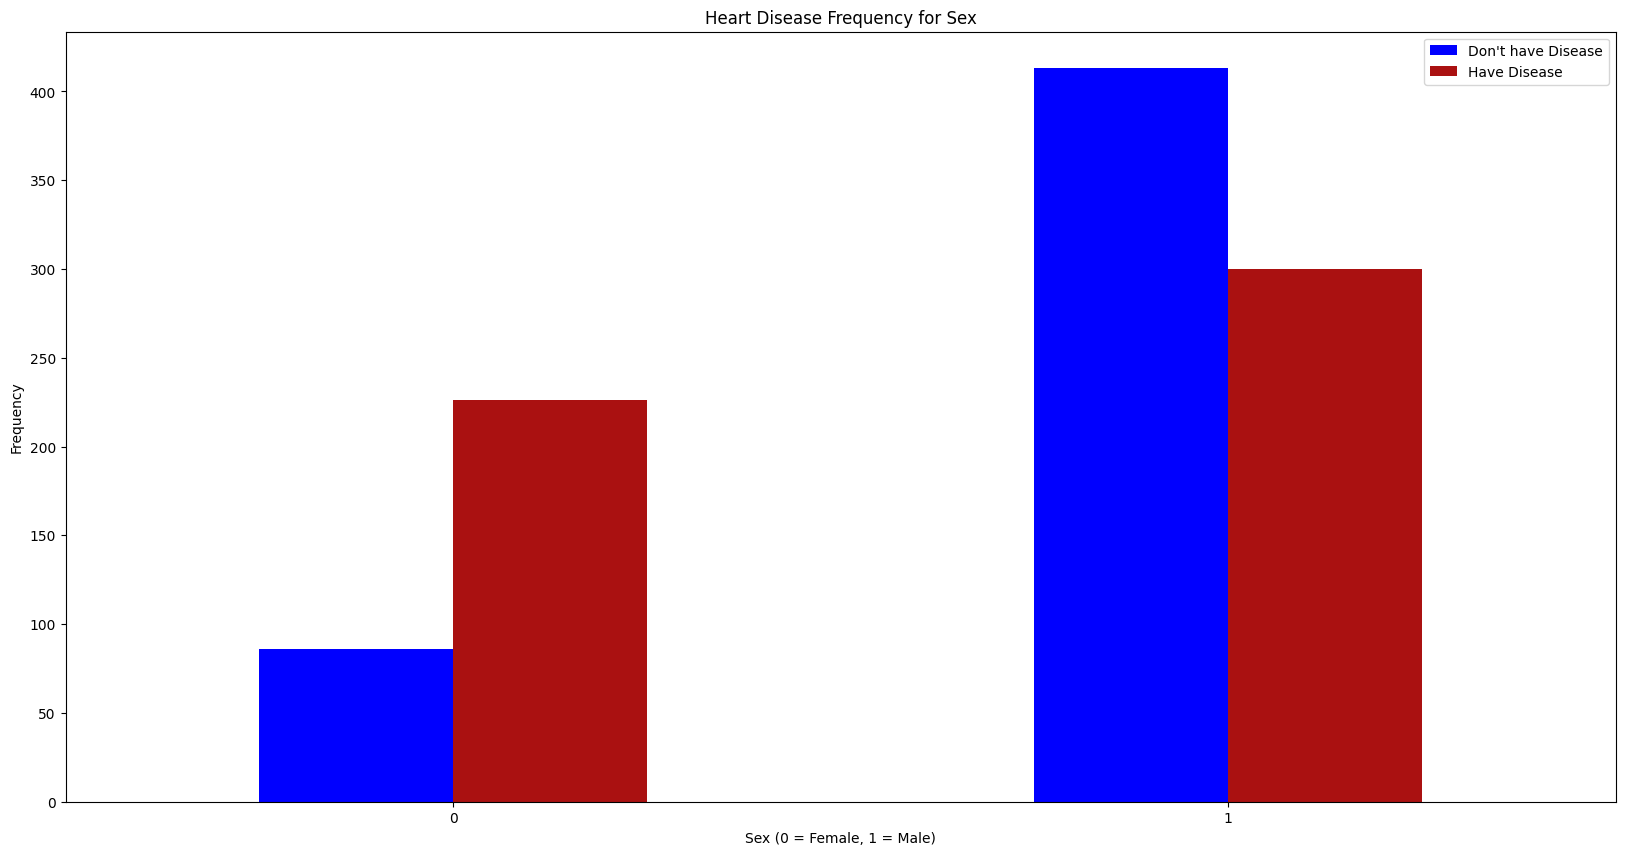

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
data.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                0                     125          212   
1   53    1                0                     140          203   
2   70    1                0                     145          174   
3   61    1                0                     148          203   
4   62    0                0                     138          294   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         1                      168   
1                    1         0                      155   
2                    0         1                      125   
3                    0         1                      161   
4                    1         1                      106   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            1.0         2                  2   
1                        1            3.1         0                  0   
2                        1            2.6         0                  0   
3                        0            0.0         2                  1   
4                        0            1.9         1                  3   

   thalassemia  target  
0            3       0  
1            3       0  
2            3       0  
3            3       0  
4            2       0

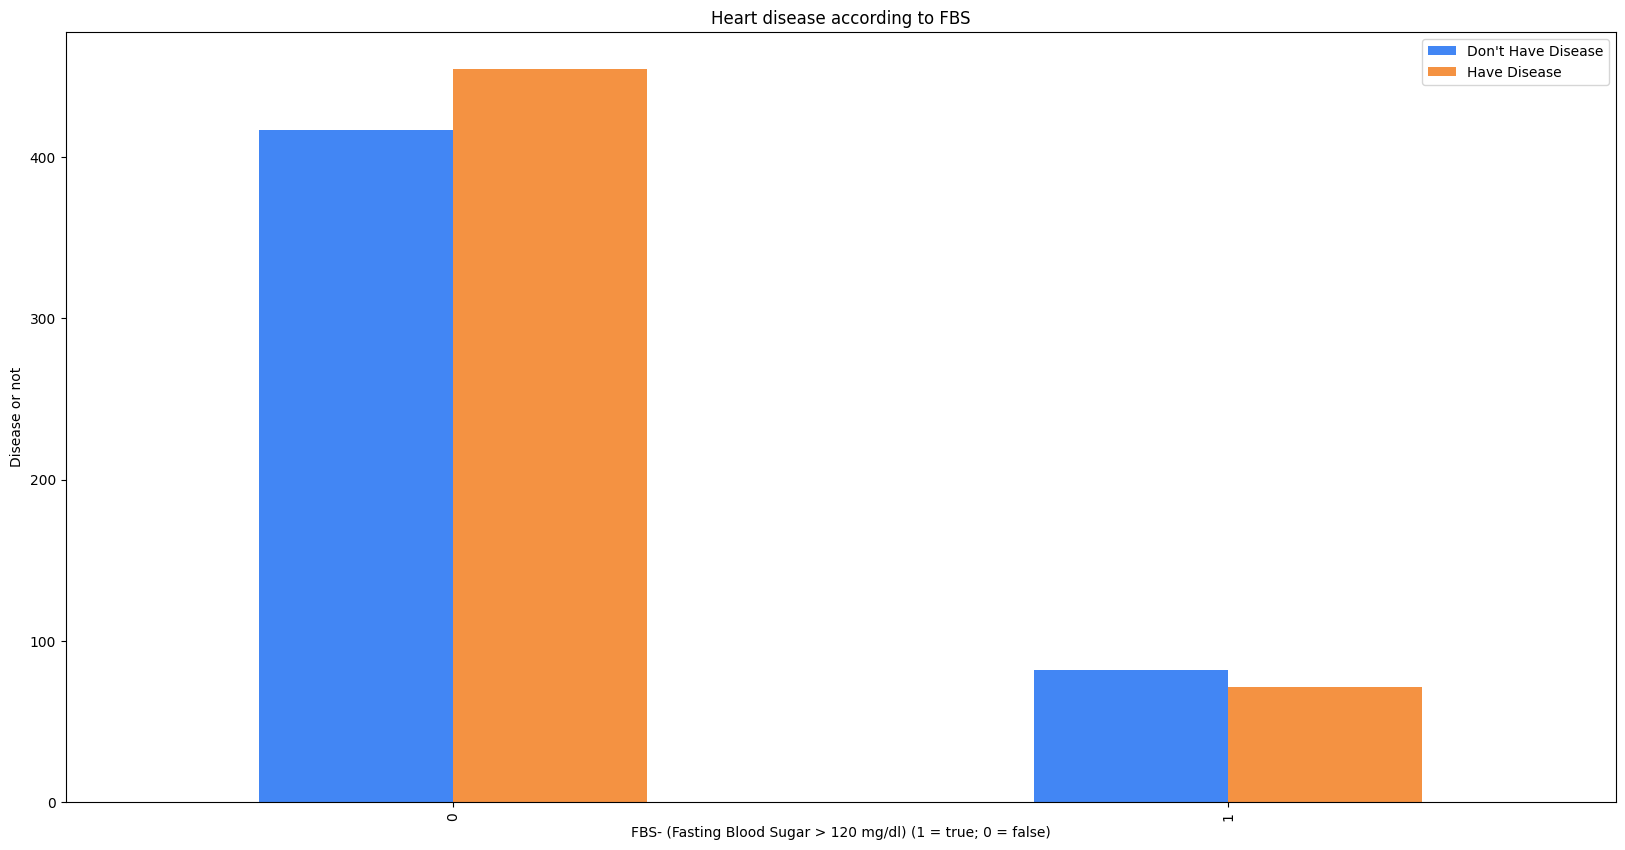

In [ ]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

In [ ]:
data["chest_pain_type"].unique()

array([0, 1, 2, 3])

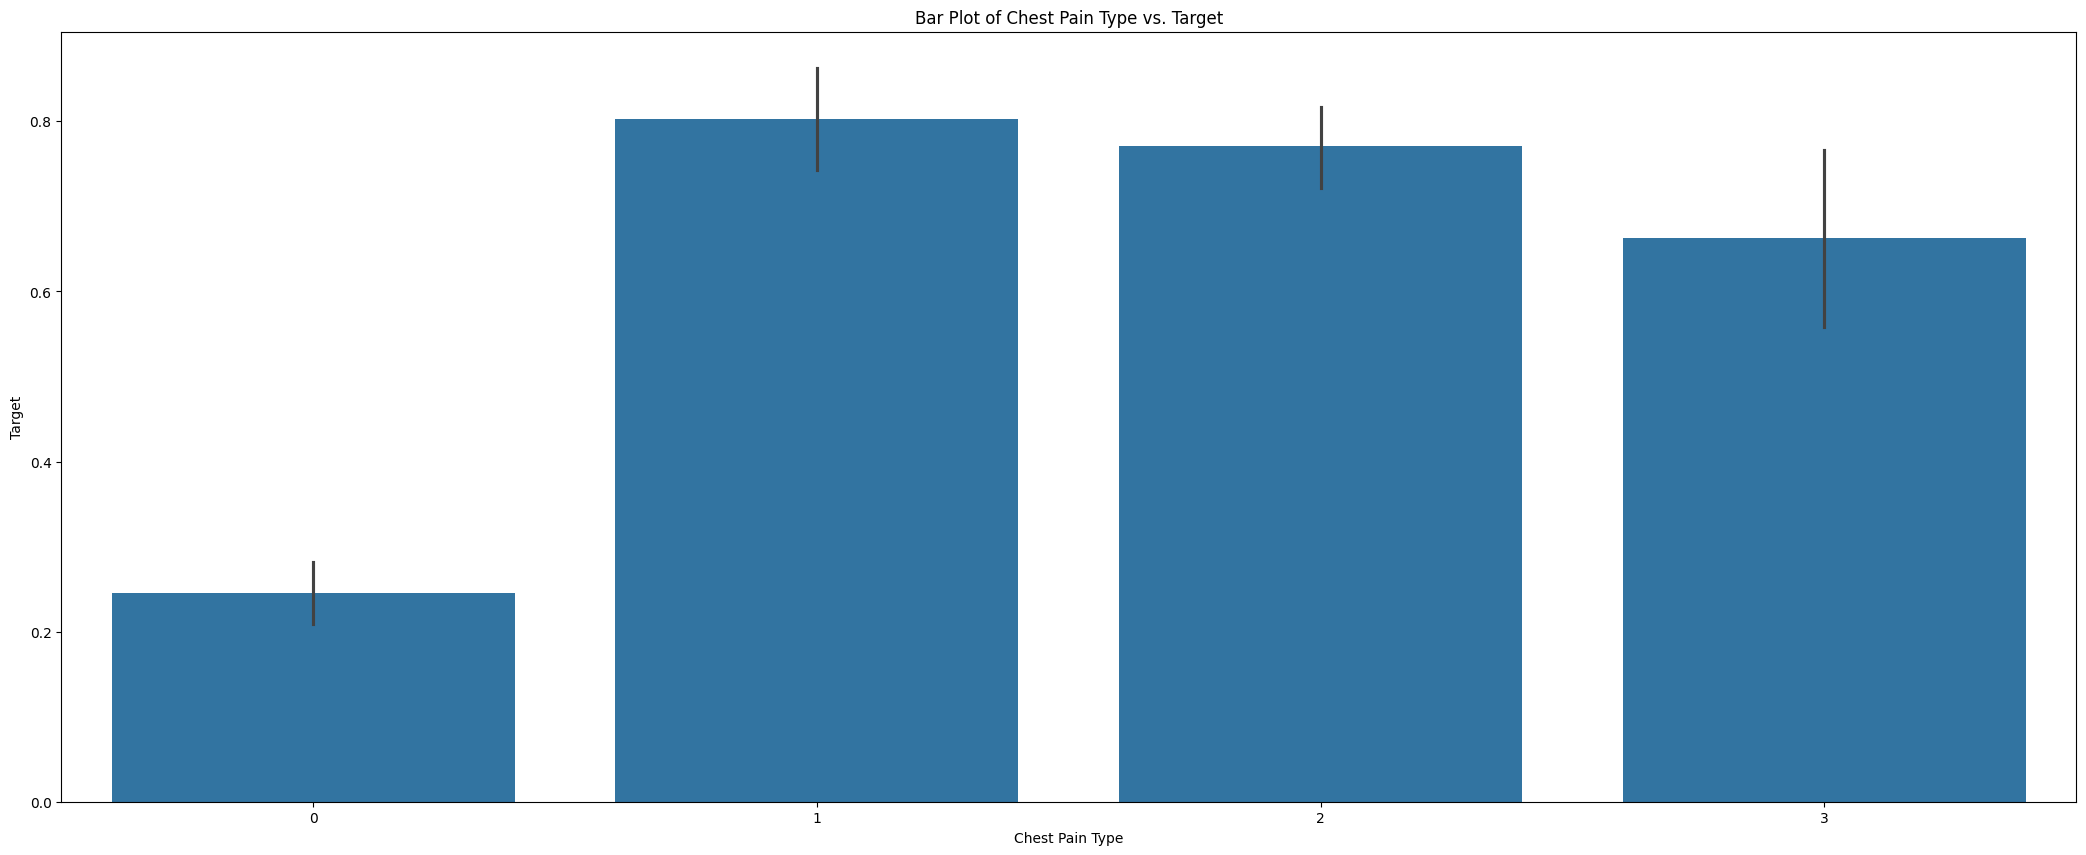

In [ ]:
plt.figure(figsize=(26, 10))
sns.barplot(x=data["chest_pain_type"], y=data["target"])

plt.xlabel('Chest Pain Type')
plt.ylabel('Target')
plt.title('Bar Plot of Chest Pain Type vs. Target')
plt.show()

In [ ]:
data["resting_blood_pressure"].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

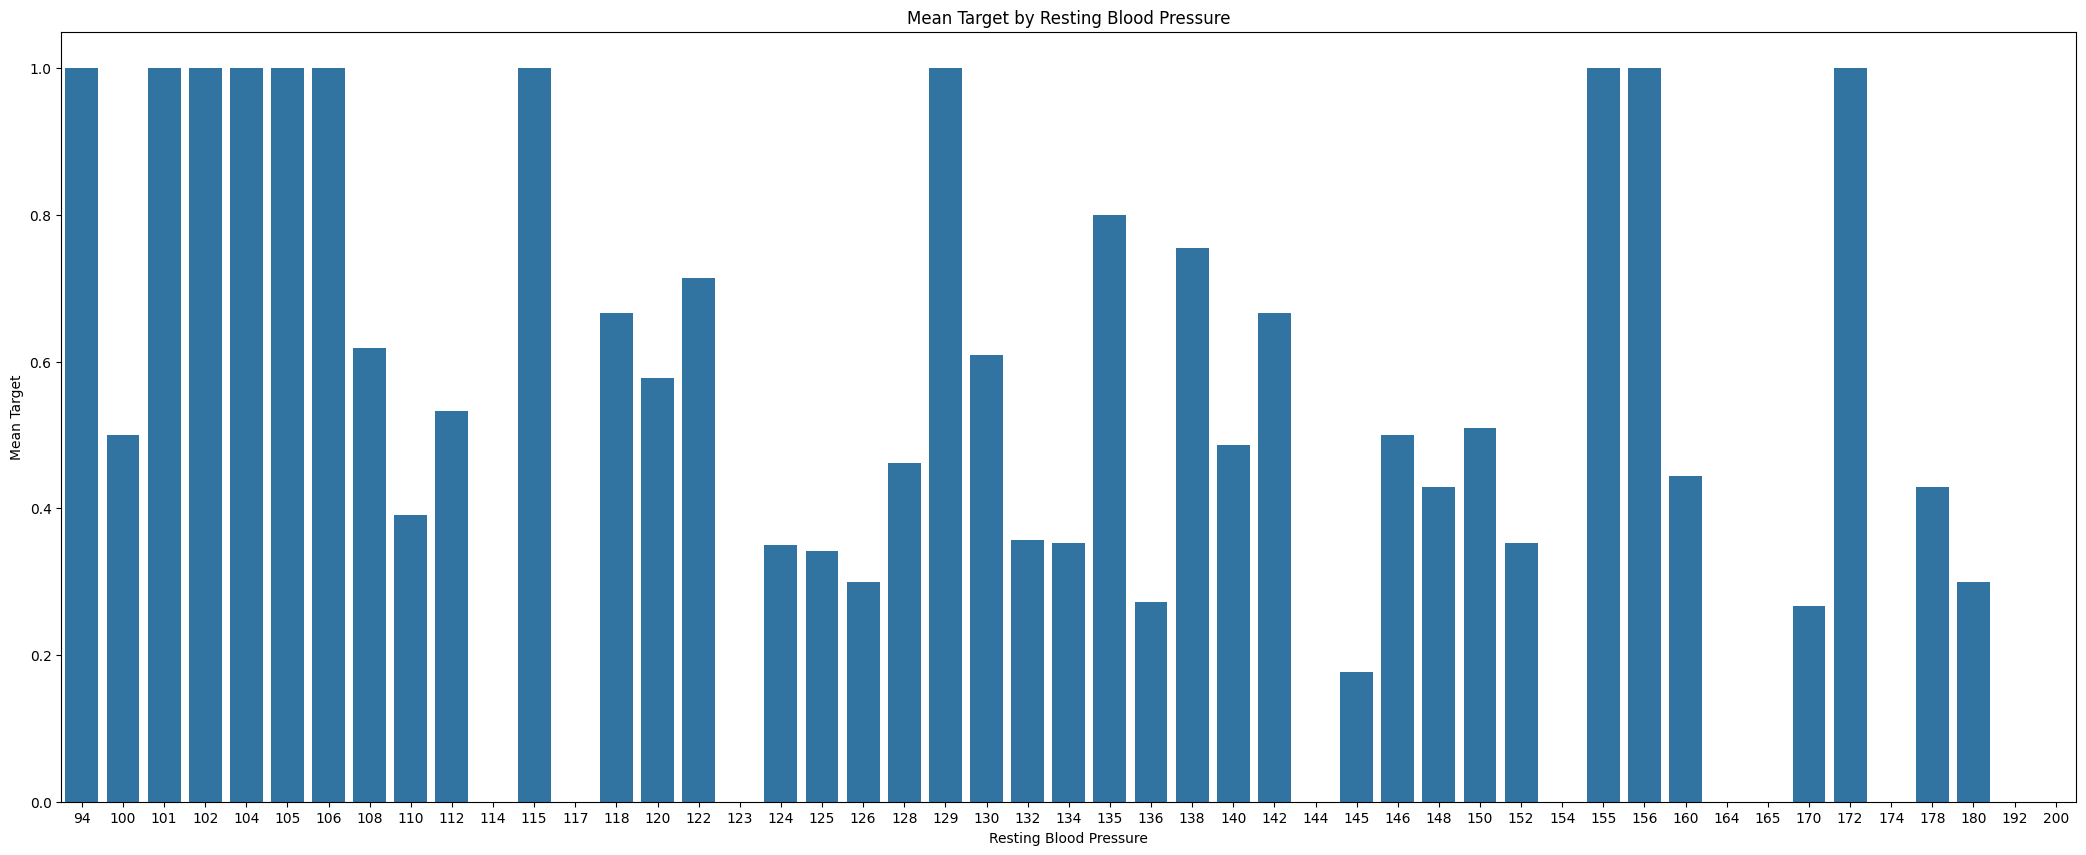

In [ ]:
agg_data = data.groupby('resting_blood_pressure')['target'].mean().reset_index()

plt.figure(figsize=(26, 10))
sns.barplot(x='resting_blood_pressure', y='target', data=agg_data)

plt.xlabel('Resting Blood Pressure')
plt.ylabel('Mean Target')
plt.title('Mean Target by Resting Blood Pressure')
plt.show()

In [ ]:
data["rest_ecg"].unique()

array([1, 0, 2])

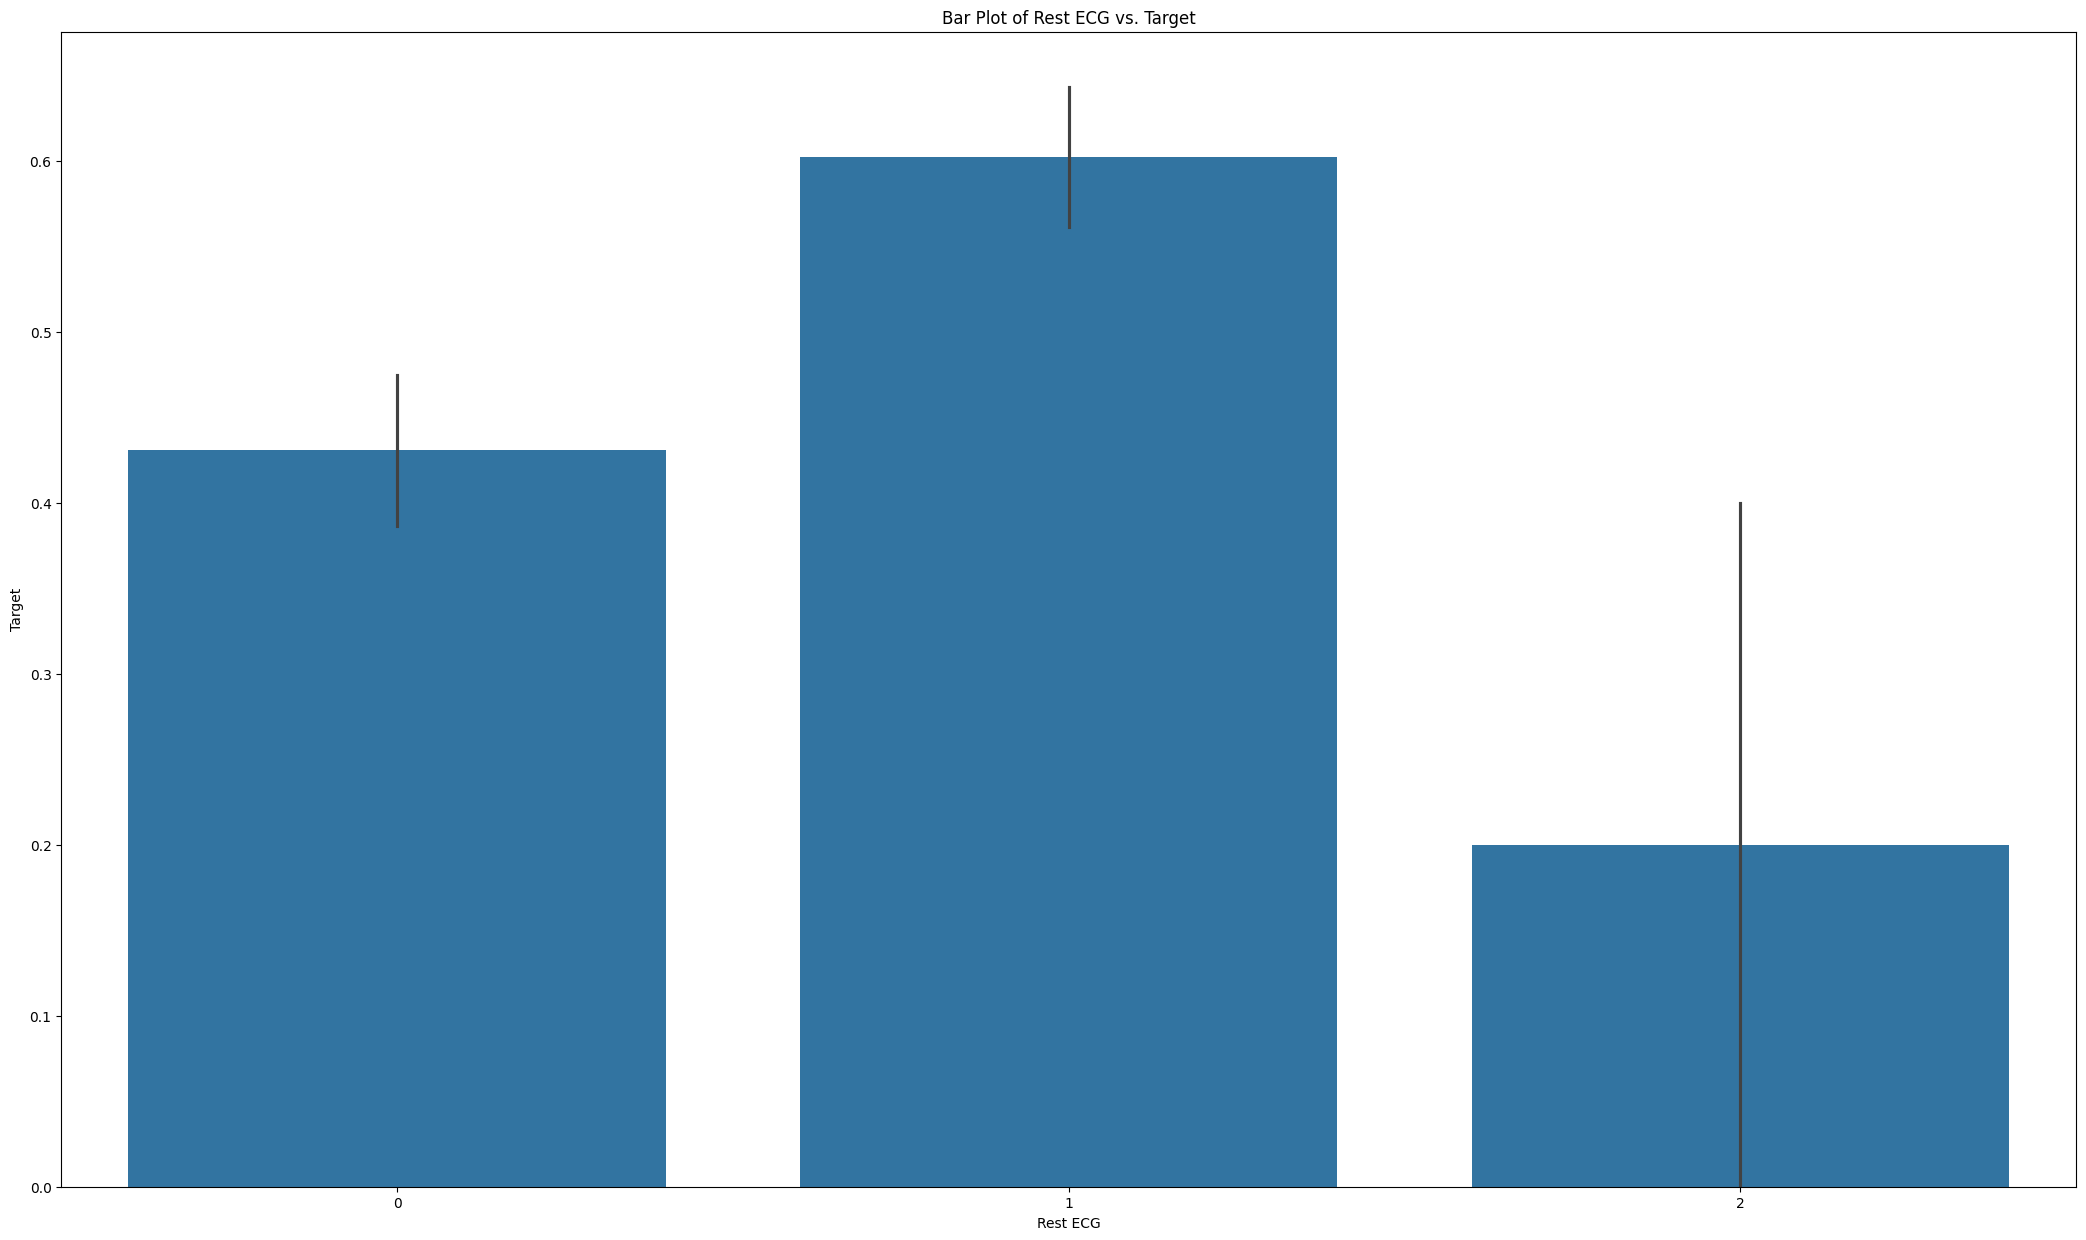

In [ ]:
y = data["target"]

plt.figure(figsize=(26, 15))
sns.barplot(x=data["rest_ecg"], y=y)

plt.xlabel('Rest ECG')
plt.ylabel('Target')
plt.title('Bar Plot of Rest ECG vs. Target')
plt.show()


In [ ]:
data["exercise_induced_angina"].unique()

array([0, 1])

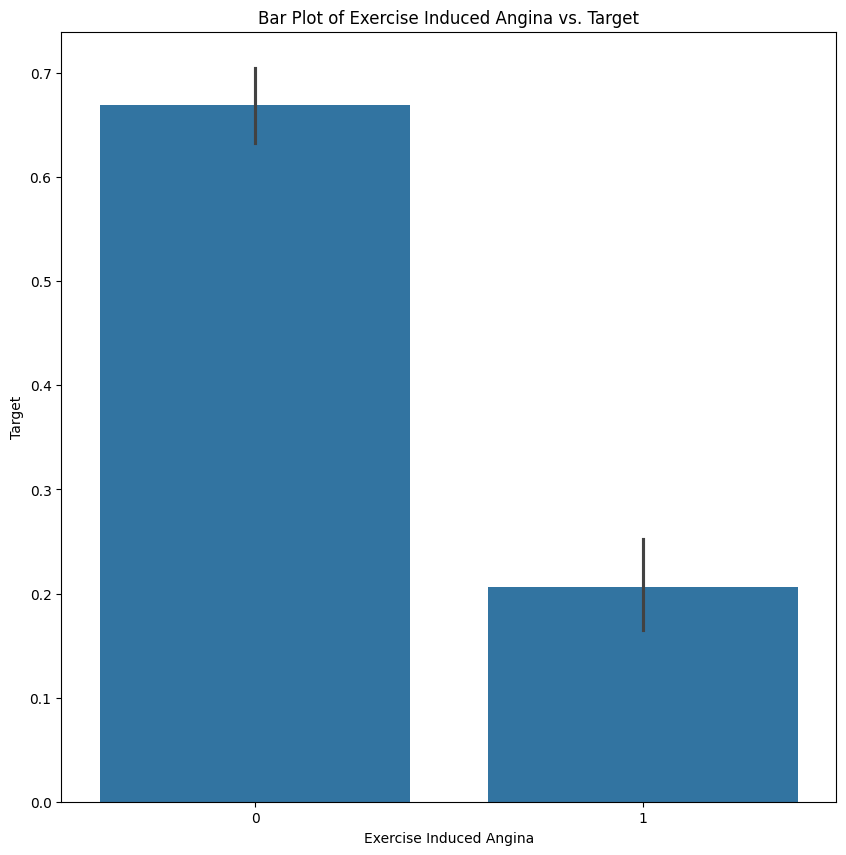

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=data["exercise_induced_angina"], y=y)

plt.xlabel('Exercise Induced Angina')
plt.ylabel('Target')
plt.title('Bar Plot of Exercise Induced Angina vs. Target')
plt.show()

In [ ]:
data["st_slope"].unique()

array([2, 0, 1])

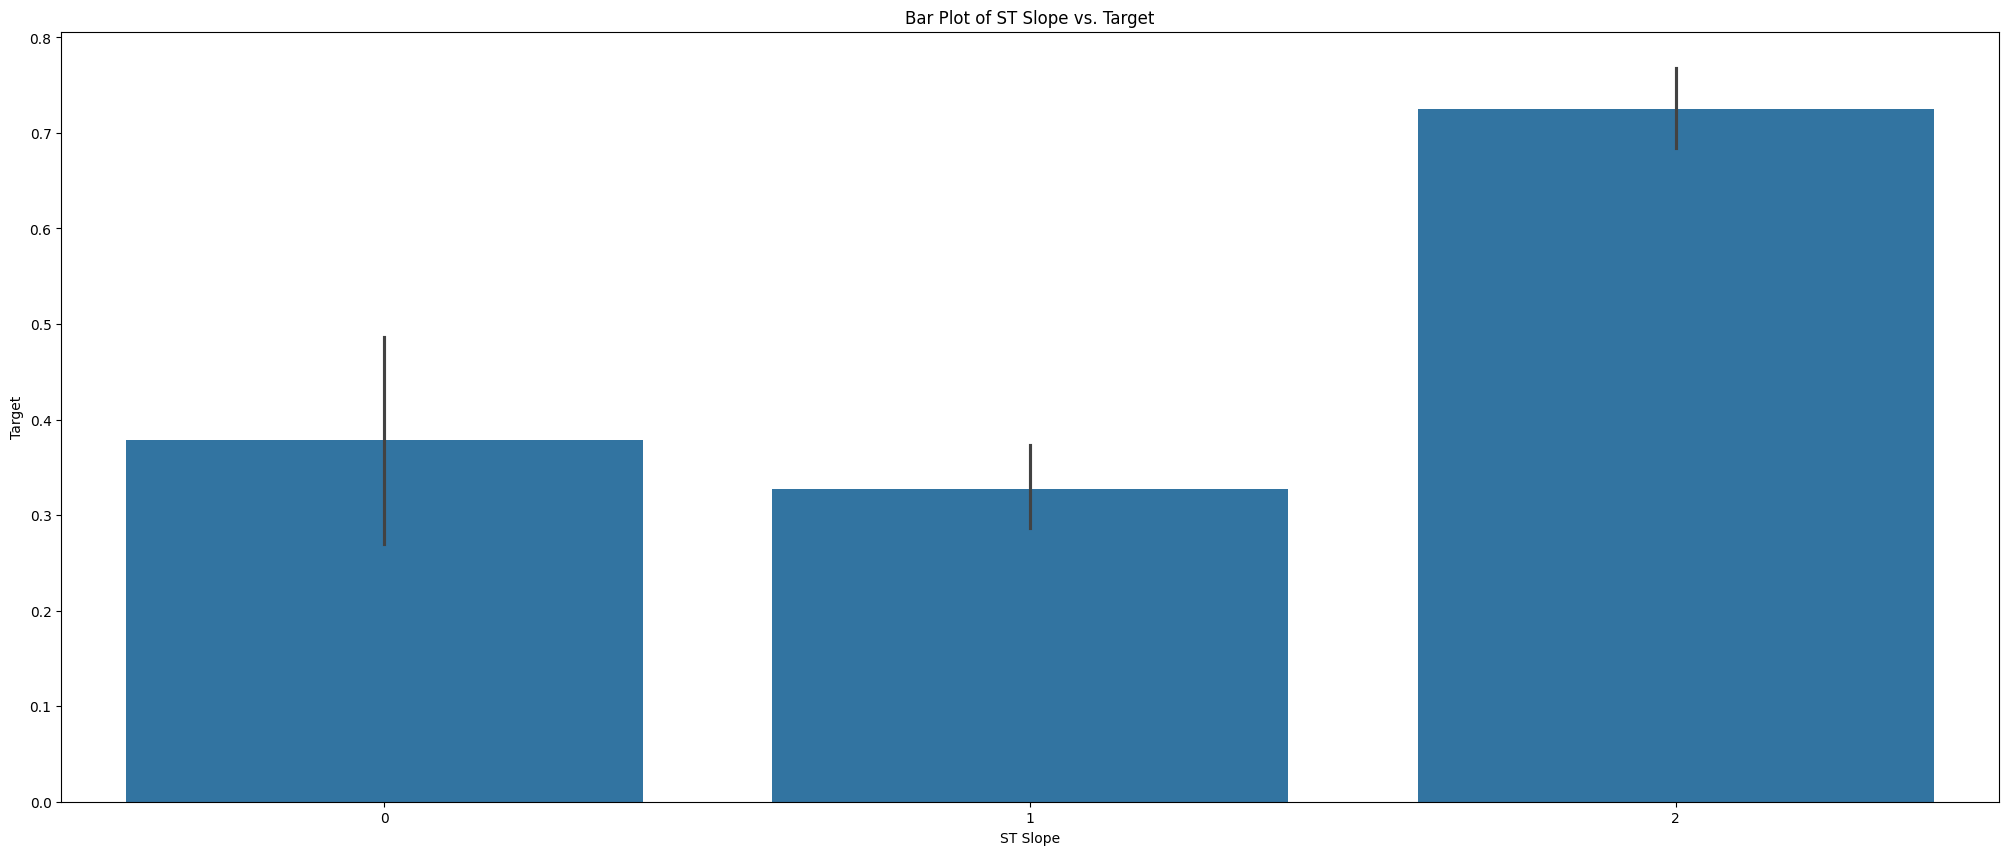

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(x=data["st_slope"], y=y)

plt.xlabel('ST Slope')
plt.ylabel('Target')
plt.title('Bar Plot of ST Slope vs. Target')
plt.show()

In [ ]:
data["num_major_vessels"].unique()

array([2, 0, 1, 3, 4])

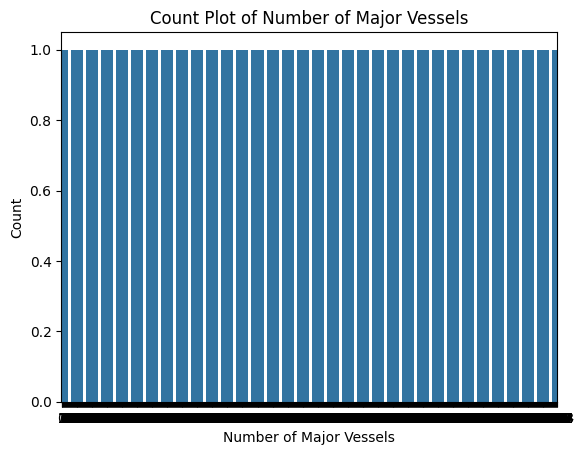

In [ ]:
sns.countplot(data["num_major_vessels"])
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.title('Count Plot of Number of Major Vessels')
plt.show()

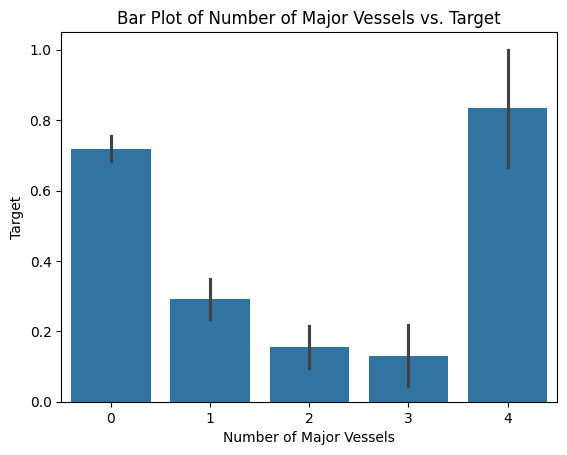

In [ ]:
sns.barplot(x=data["num_major_vessels"], y=y)

plt.xlabel('Number of Major Vessels')
plt.ylabel('Target')
plt.title('Bar Plot of Number of Major Vessels vs. Target')
plt.show()

In [ ]:
data["thalassemia"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thalassemia', ylabel='Density'>

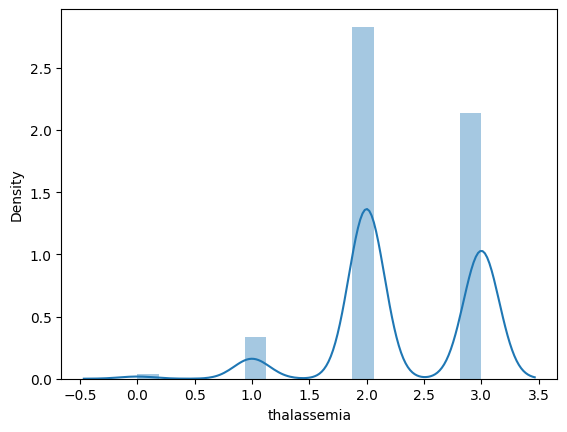

In [ ]:
sns.distplot(data["thalassemia"])

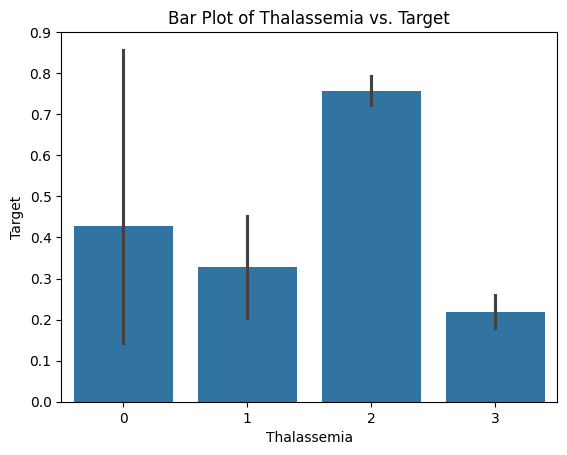

In [ ]:
sns.barplot(x=data["thalassemia"], y=y)

plt.xlabel('Thalassemia')
plt.ylabel('Target')
plt.title('Bar Plot of Thalassemia vs. Target')
plt.show()

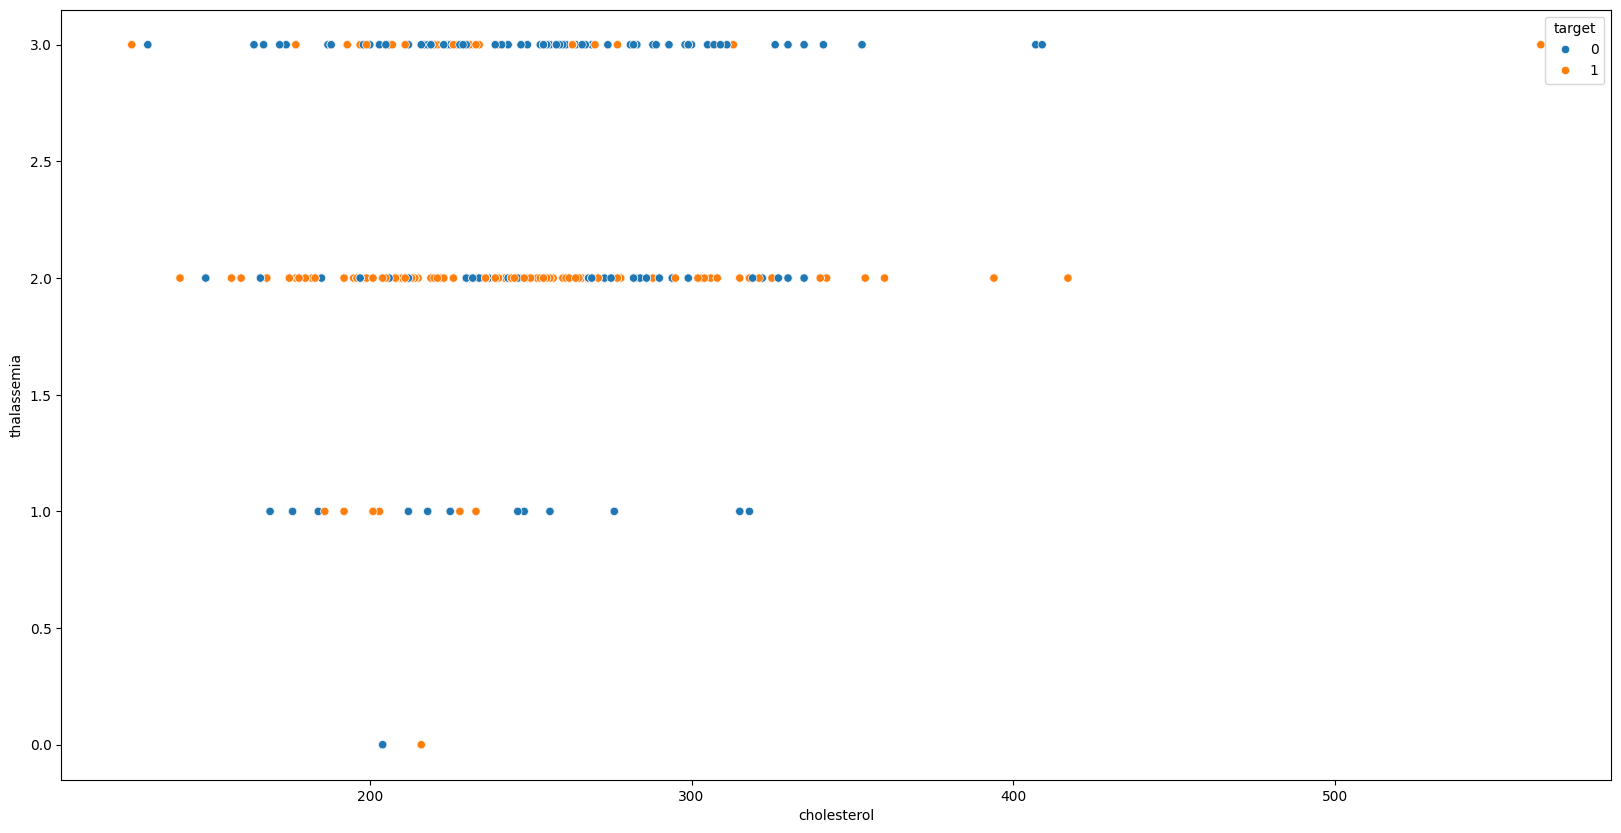

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

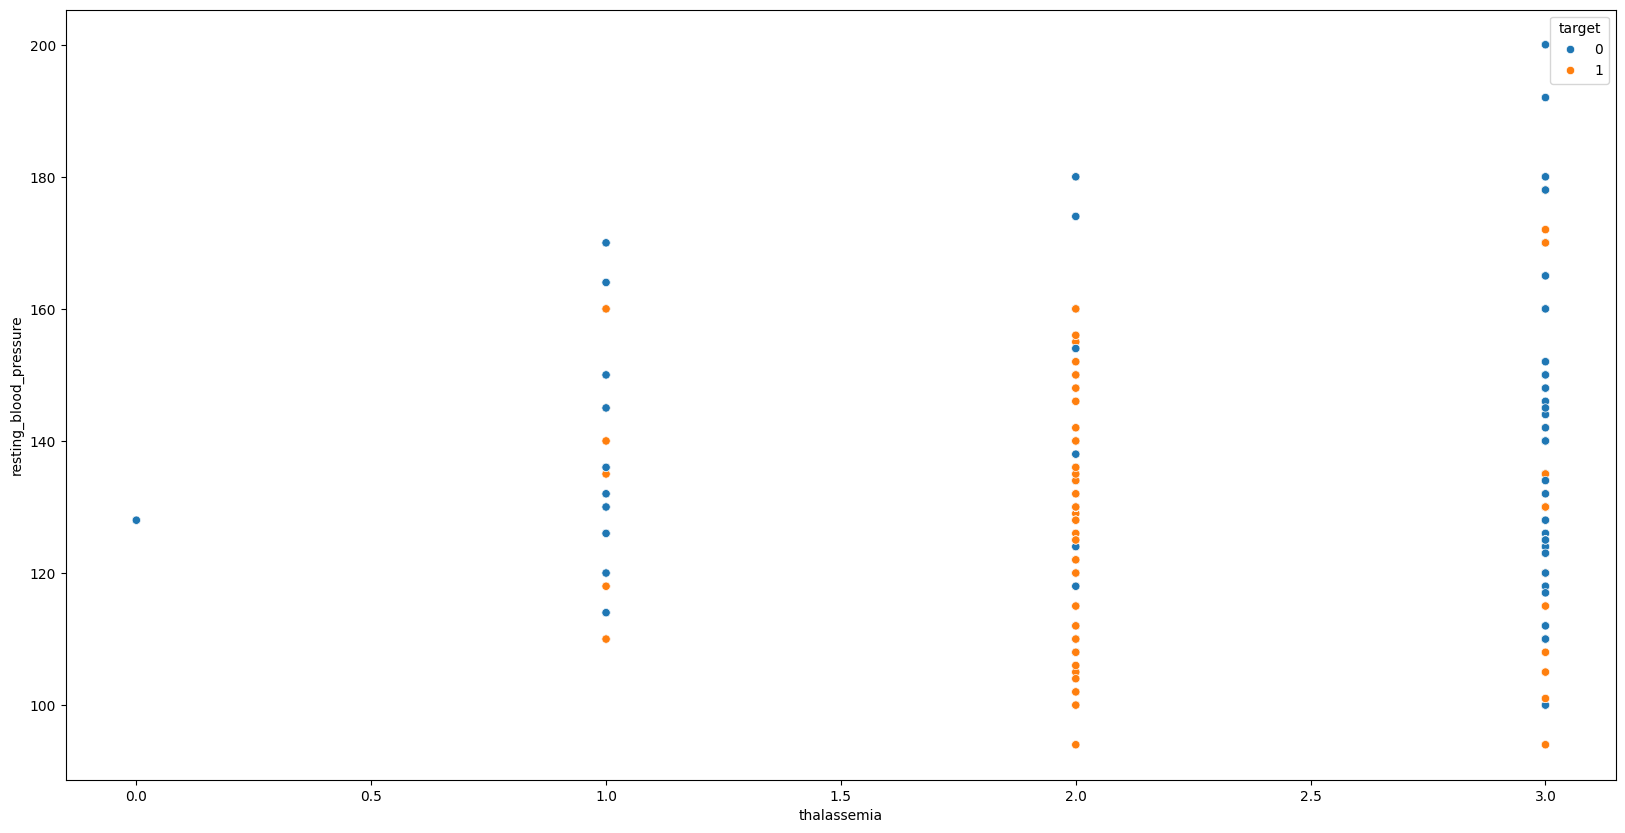

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

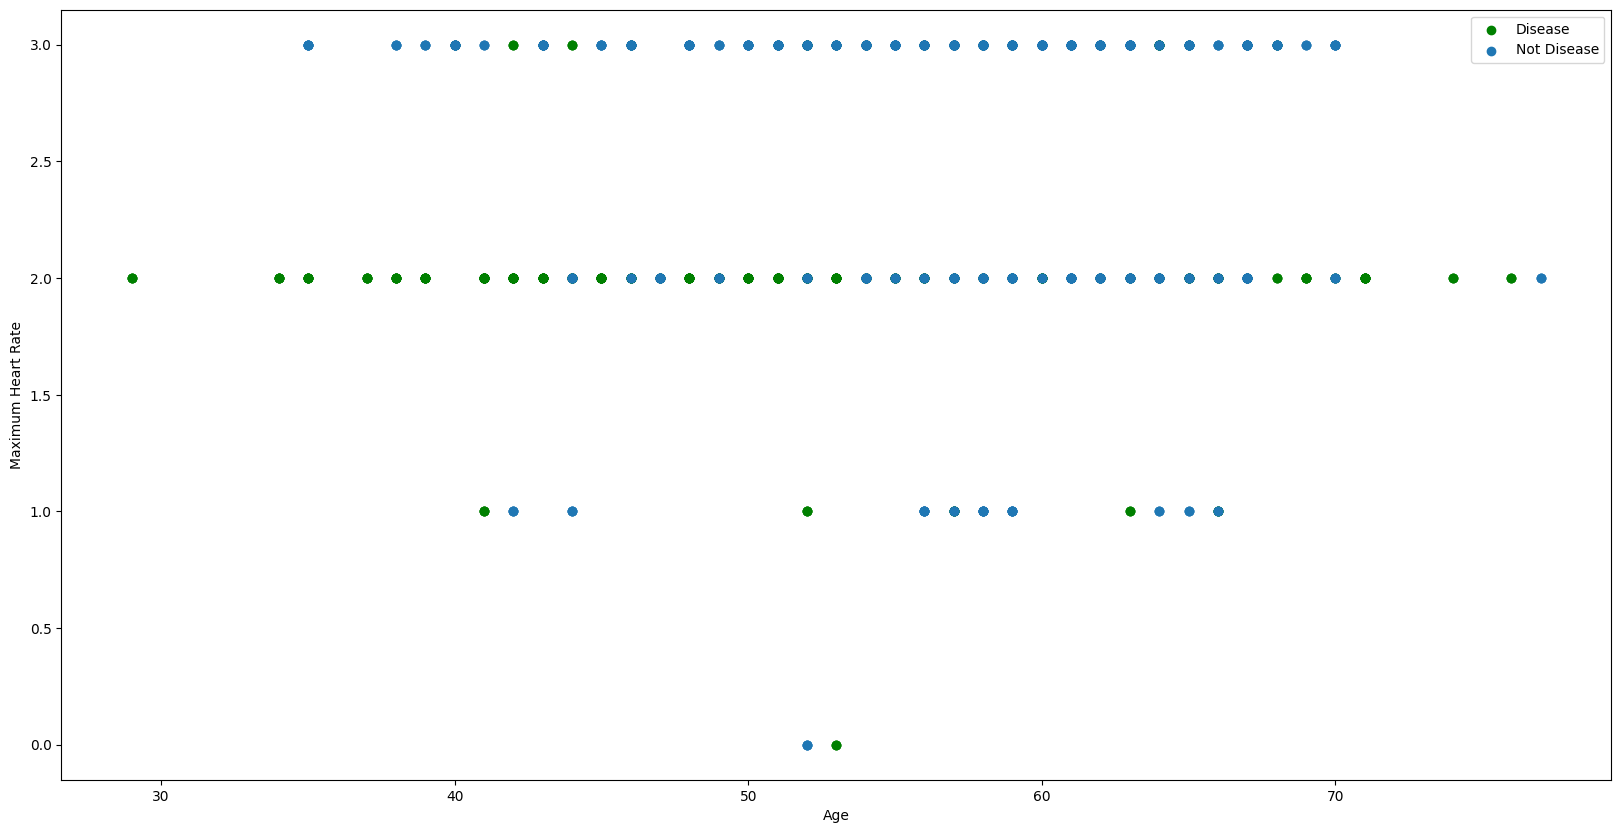

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

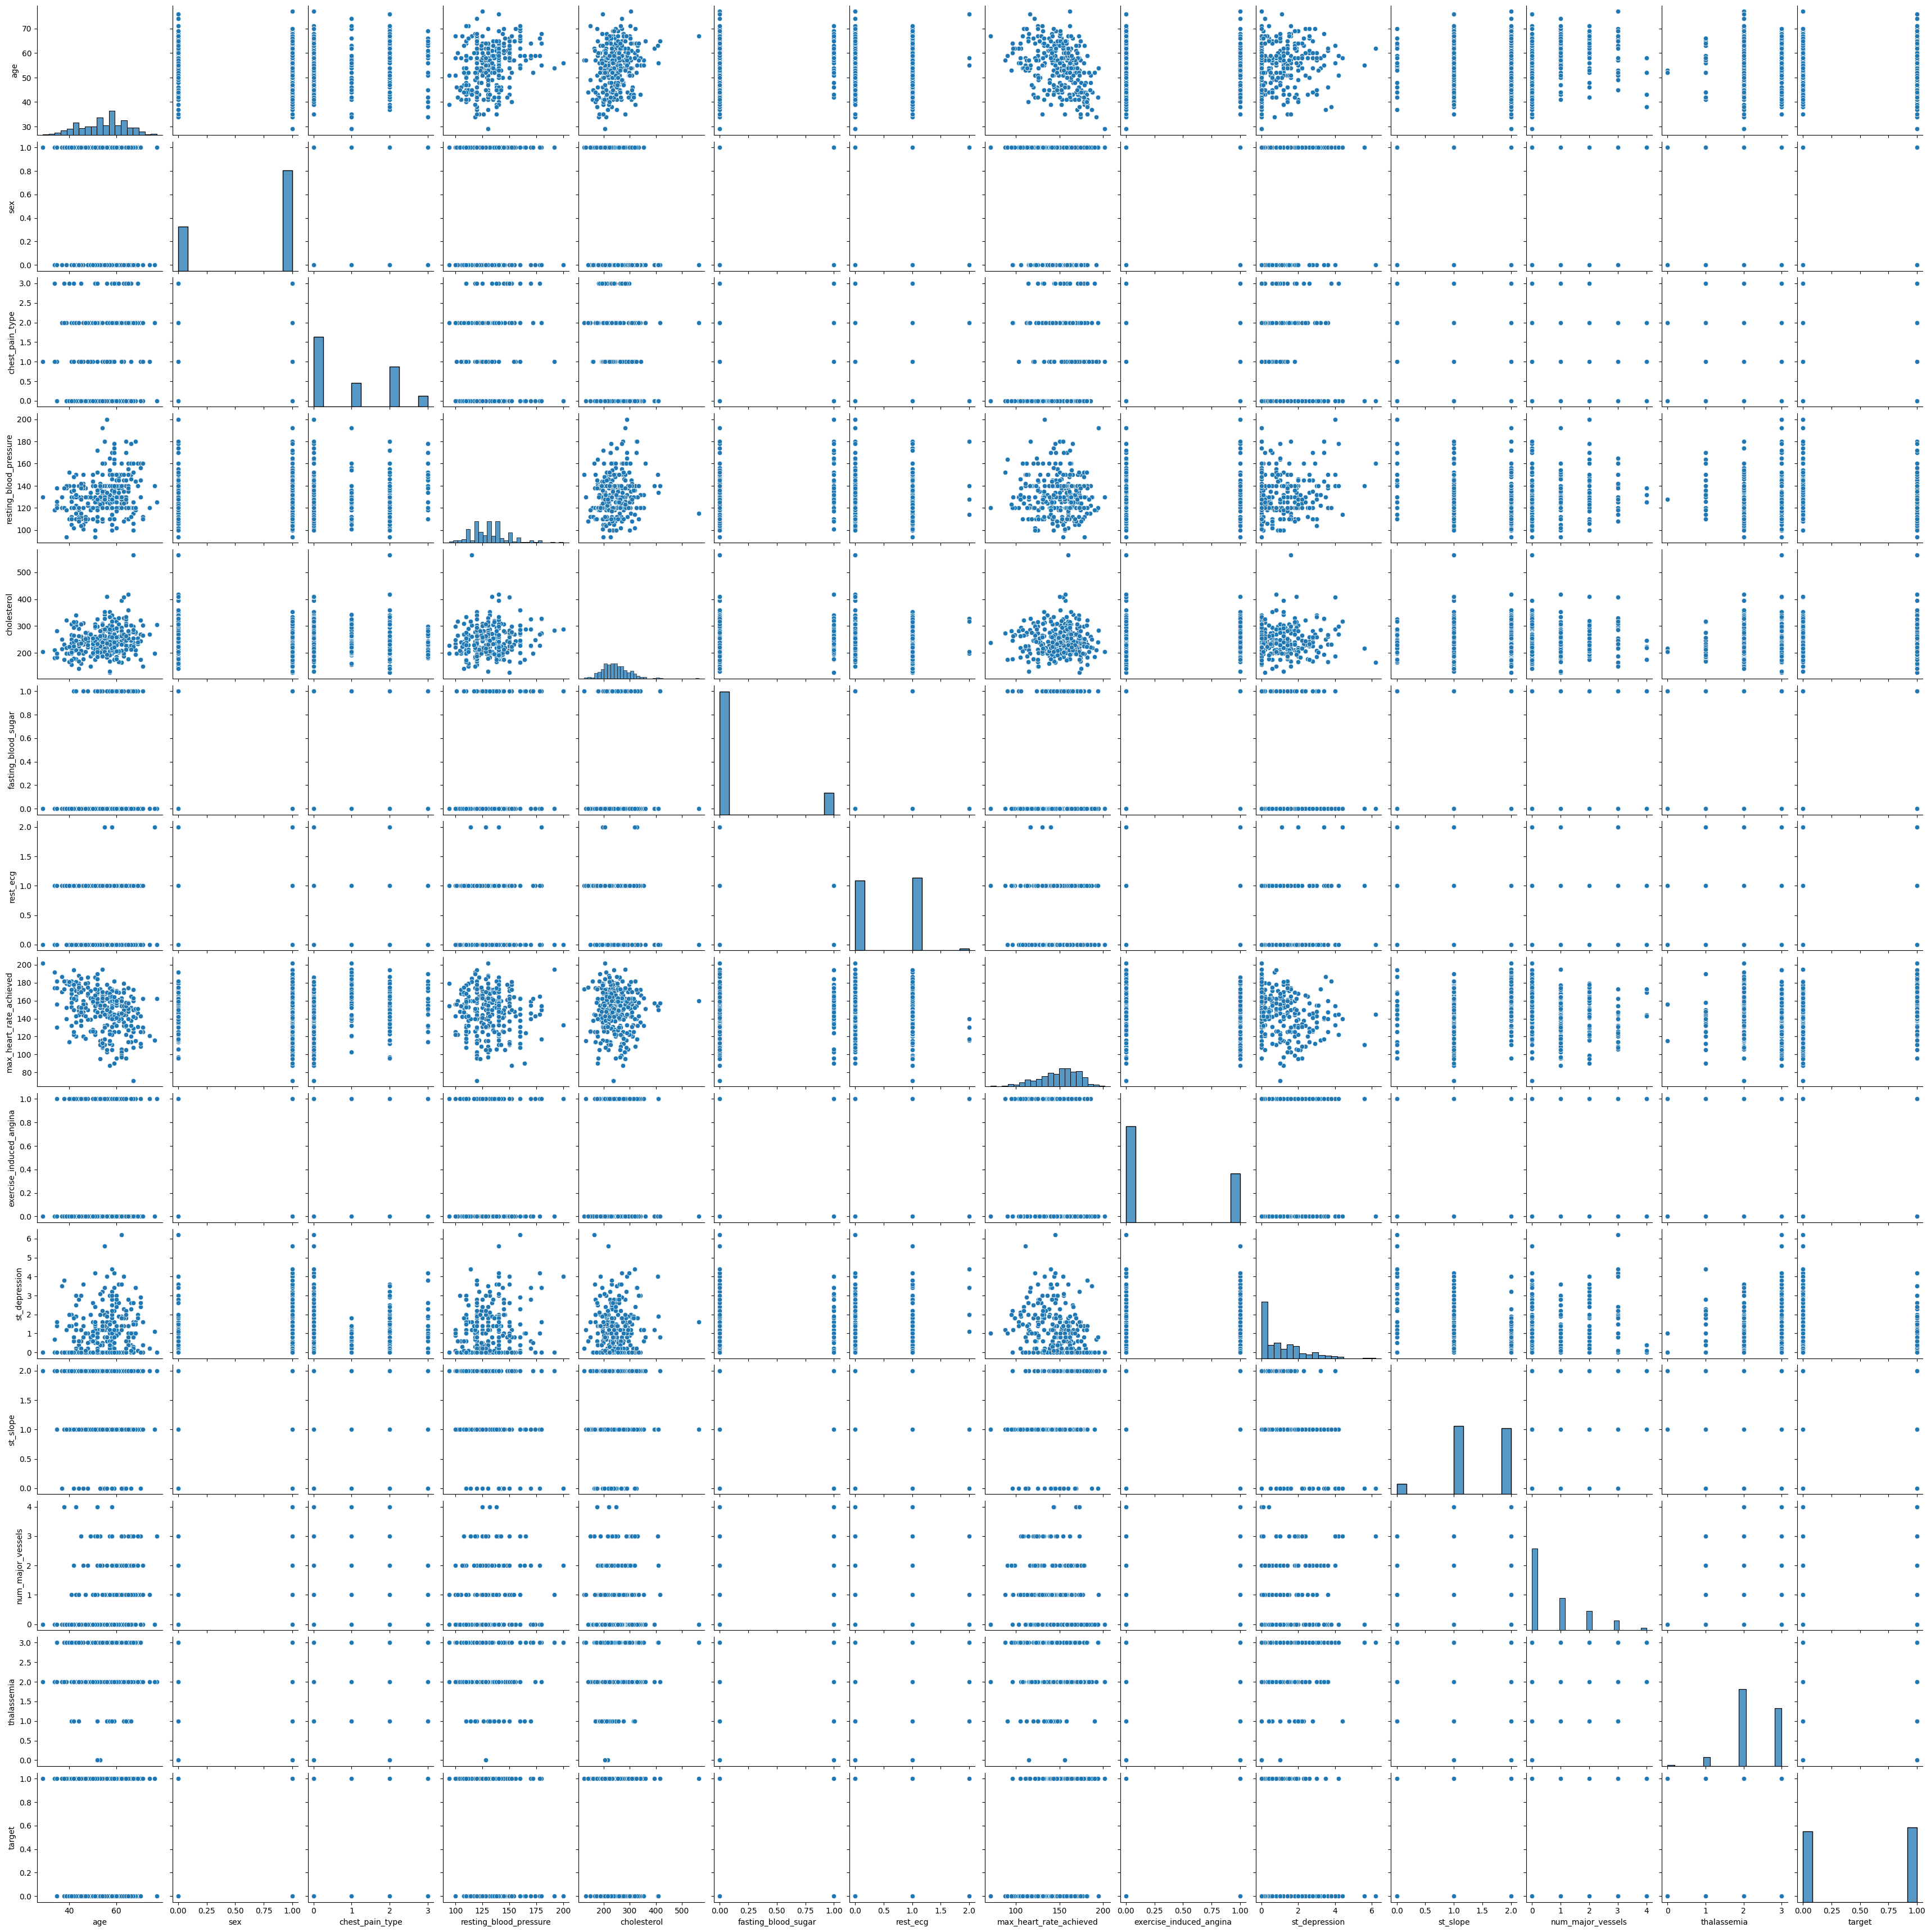

In [ ]:
sns.pairplot(data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'rest_ecg'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'thalassemia'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

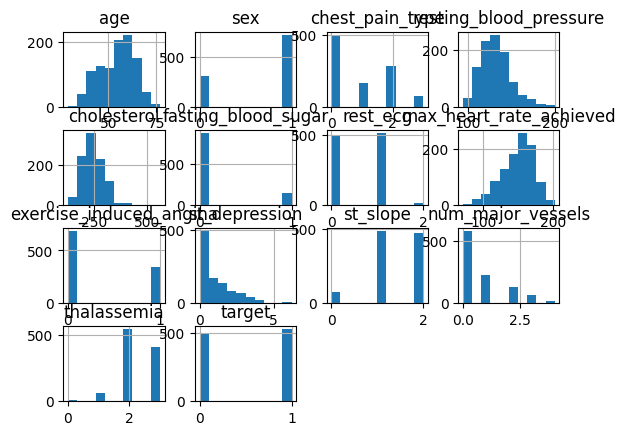

In [ ]:
data.hist()

In [ ]:
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

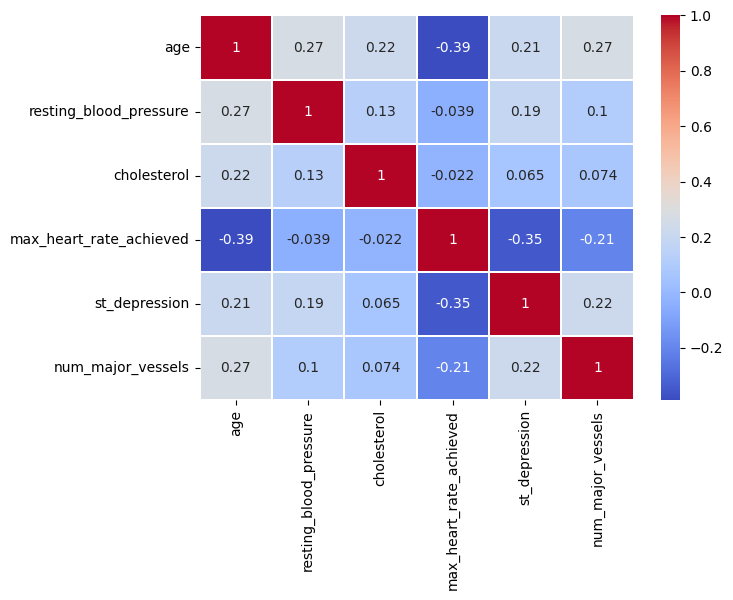

In [ ]:
f, ax = plt.subplots(figsize=(7, 5))

df_corr = data.loc[:,cnames]

corr = df_corr.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [ ]:
df_corr = data.loc[:,cnames]
df_corr

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0      52                     125          212                      168   
1      53                     140          203                      155   
2      70                     145          174                      125   
3      61                     148          203                      161   
4      62                     138          294                      106   
...   ...                     ...          ...                      ...   
1020   59                     140          221                      164   
1021   60                     125          258                      141   
1022   47                     110          275                      118   
1023   50                     110          254                      159   
1024   54                     120          188                      113   

      st_depression  num_major_vessels  
0               1.0                  2  
1               3.1                  0  
2               2.6                  0  
3               0.0                  1  
4               1.9                  3  
...             ...                ...  
1020            0.0                  0  
1021            2.8                  1  
1022            1.0                  1  
1023            0.0                  0  
1024            1.4                  1  

[1025 rows x 6 columns]

In [ ]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 820 records and Testing features have 205 records.


In [ ]:
X_train.shape

(820, 13)

In [ ]:
X_test.shape

(205, 13)

In [ ]:
Y_train.shape

(820,)

In [ ]:
Y_test.shape

(205,)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]


In [ ]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [ ]:
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 86.22%
Test accuracy: 86.34%


In [ ]:
clf = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.8975609756097561

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<Axes: >

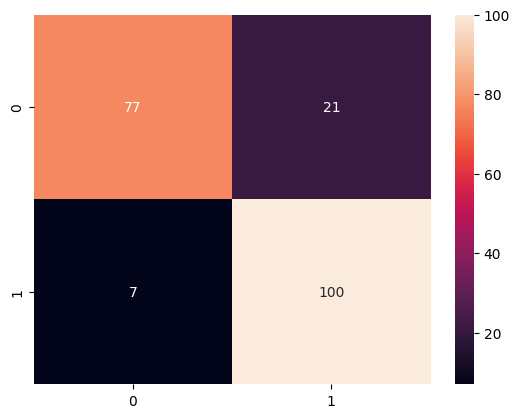

In [ ]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(Y_test, y_pred_lr)

In [ ]:
print("Precision: ",precision)

Precision:  0.8264462809917356


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(Y_test, y_pred_lr)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.9345794392523364


In [ ]:
print((2*precision*recall)/(precision+recall))

0.8771929824561404


In [ ]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0    0    1
target         
0       77   21
1        7  100

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
fnr=FN*100/(FN+TP)
fnr

6.542056074766355

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]


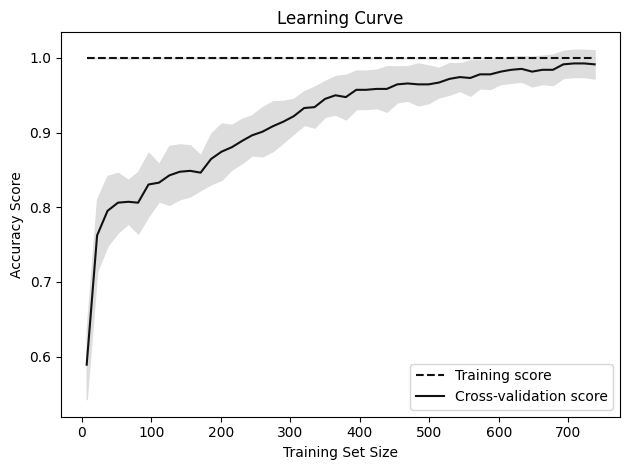

In [ ]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 100.0 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.902


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<Axes: >

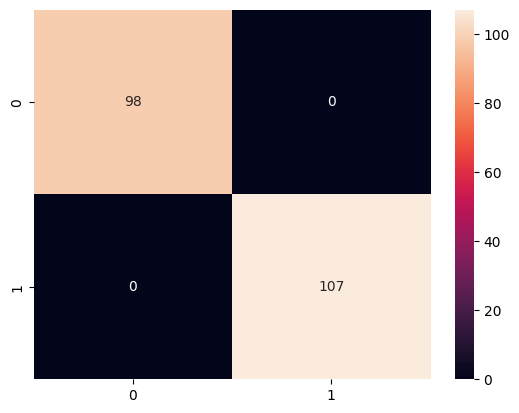

In [ ]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(Y_test, y_pred_rf)

In [ ]:
print("Precision: ",precision)

Precision:  1.0


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(Y_test, y_pred_rf)

In [ ]:
print("Recall is: ",recall)

Recall is:  1.0


In [ ]:
print((2*precision*recall)/(precision+recall))

1.0


In [ ]:
CM = pd.crosstab(Y_test, y_pred_rf)
CM

col_0    0    1
target         
0       98    0
1        0  107

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
fnr=FN*100/(FN+TP)
fnr

0.0

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 82.07%
Test accuracy: 85.37%
[1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [ ]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 82.07%
Test accuracy: 85.37%


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<Axes: >

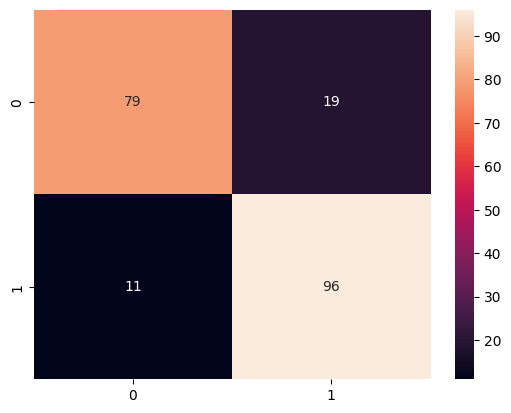

In [ ]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(Y_test, y_pred_nb)

In [ ]:
print("Precision: ",precision)

Precision:  0.8347826086956521


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(Y_test, y_pred_nb)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.897196261682243


In [ ]:
print((2*precision*recall)/(precision+recall))

0.8648648648648648


In [ ]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0    0   1
target        
0       79  19
1       11  96

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
fnr = FN*100/(FN+TP)
fnr

10.280373831775702

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 78.66%
Test accuracy: 73.66%
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0]


In [ ]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.66 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 91.71%
Test accuracy: 74.63%


In [ ]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 100.00%
n_neigbors = 2
Train accuracy: 99.39%
Test accuracy: 95.12%
n_neigbors = 3
Train accuracy: 99.02%
Test accuracy: 91.22%
n_neigbors = 4
Train accuracy: 94.39%
Test accuracy: 81.95%
n_neigbors = 5
Train accuracy: 91.71%
Test accuracy: 74.63%
n_neigbors = 6
Train accuracy: 82.32%
Test accuracy: 75.12%
n_neigbors = 7
Train accuracy: 79.51%
Test accuracy: 72.20%
n_neigbors = 8
Train accuracy: 78.66%
Test accuracy: 73.66%
n_neigbors = 9
Train accuracy: 75.73%
Test accuracy: 75.61%


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<Axes: >

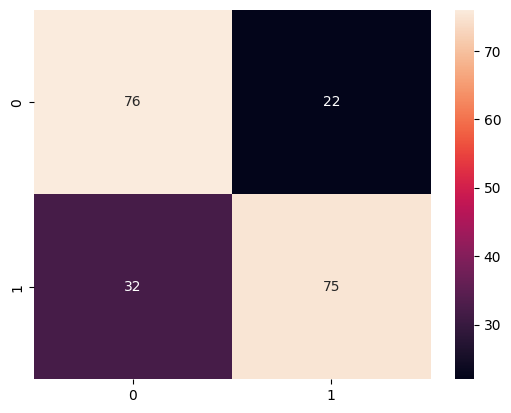

In [ ]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(Y_test, y_pred_knn)

In [ ]:
print("Precision: ",precision)

Precision:  0.7731958762886598


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(Y_test, y_pred_knn)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.7009345794392523


In [ ]:
print((2*precision*recall)/(precision+recall))

0.7352941176470589


In [ ]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0    0   1
target        
0       76  22
1       32  75

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
fnr = FN*100/(FN+TP)
fnr

29.906542056074766

In [ ]:
CM = pd.crosstab(Y_test, y_pred_knn)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

29.906542056074766

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [ ]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 84.39 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.848
Accuracy on test set: 0.844


In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
pip install pydotplus

In [ ]:
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [ ]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

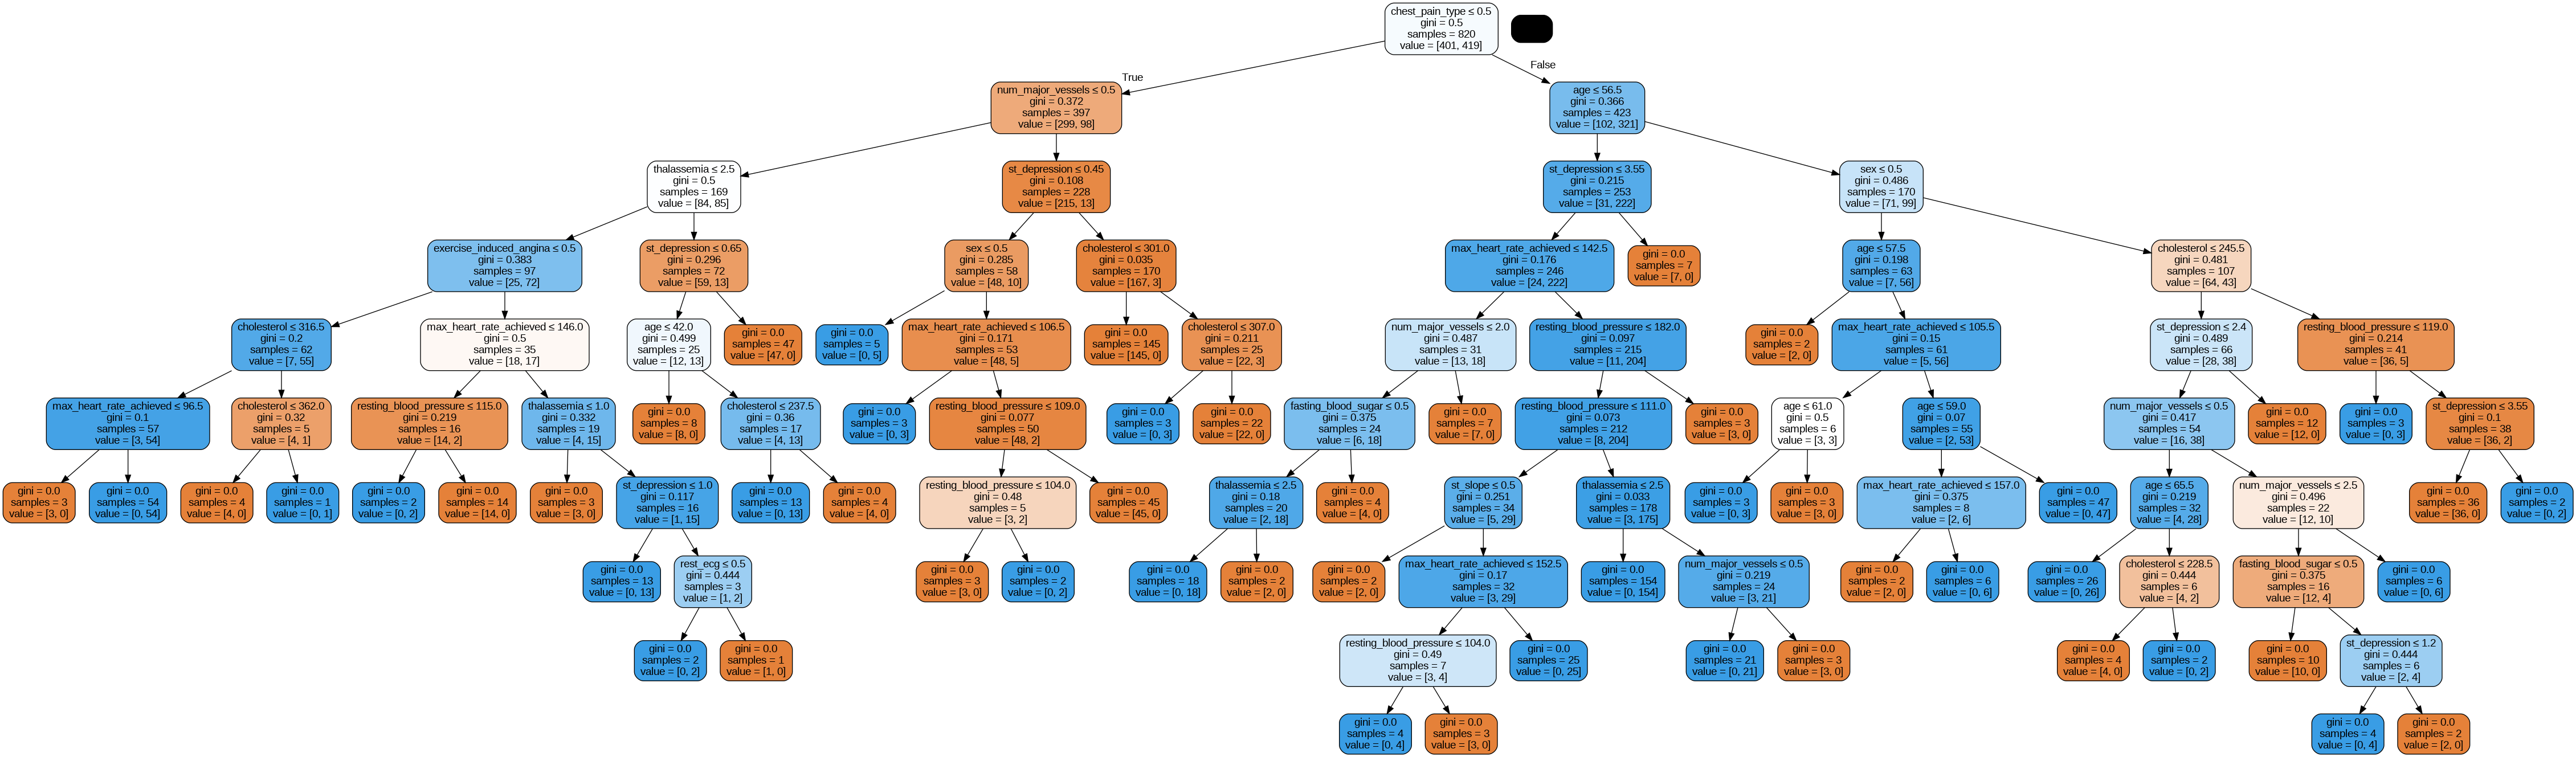

In [ ]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

In [ ]:
from sklearn import tree
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_samples_leaf=1,
                             min_samples_split=2, min_weight_fraction_leaf=0.0,
                             random_state=0, splitter='best')

print(clf)



DecisionTreeClassifier(max_depth=1, random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create DecisionTreeClassifier instance
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)


DecisionTreeClassifier()

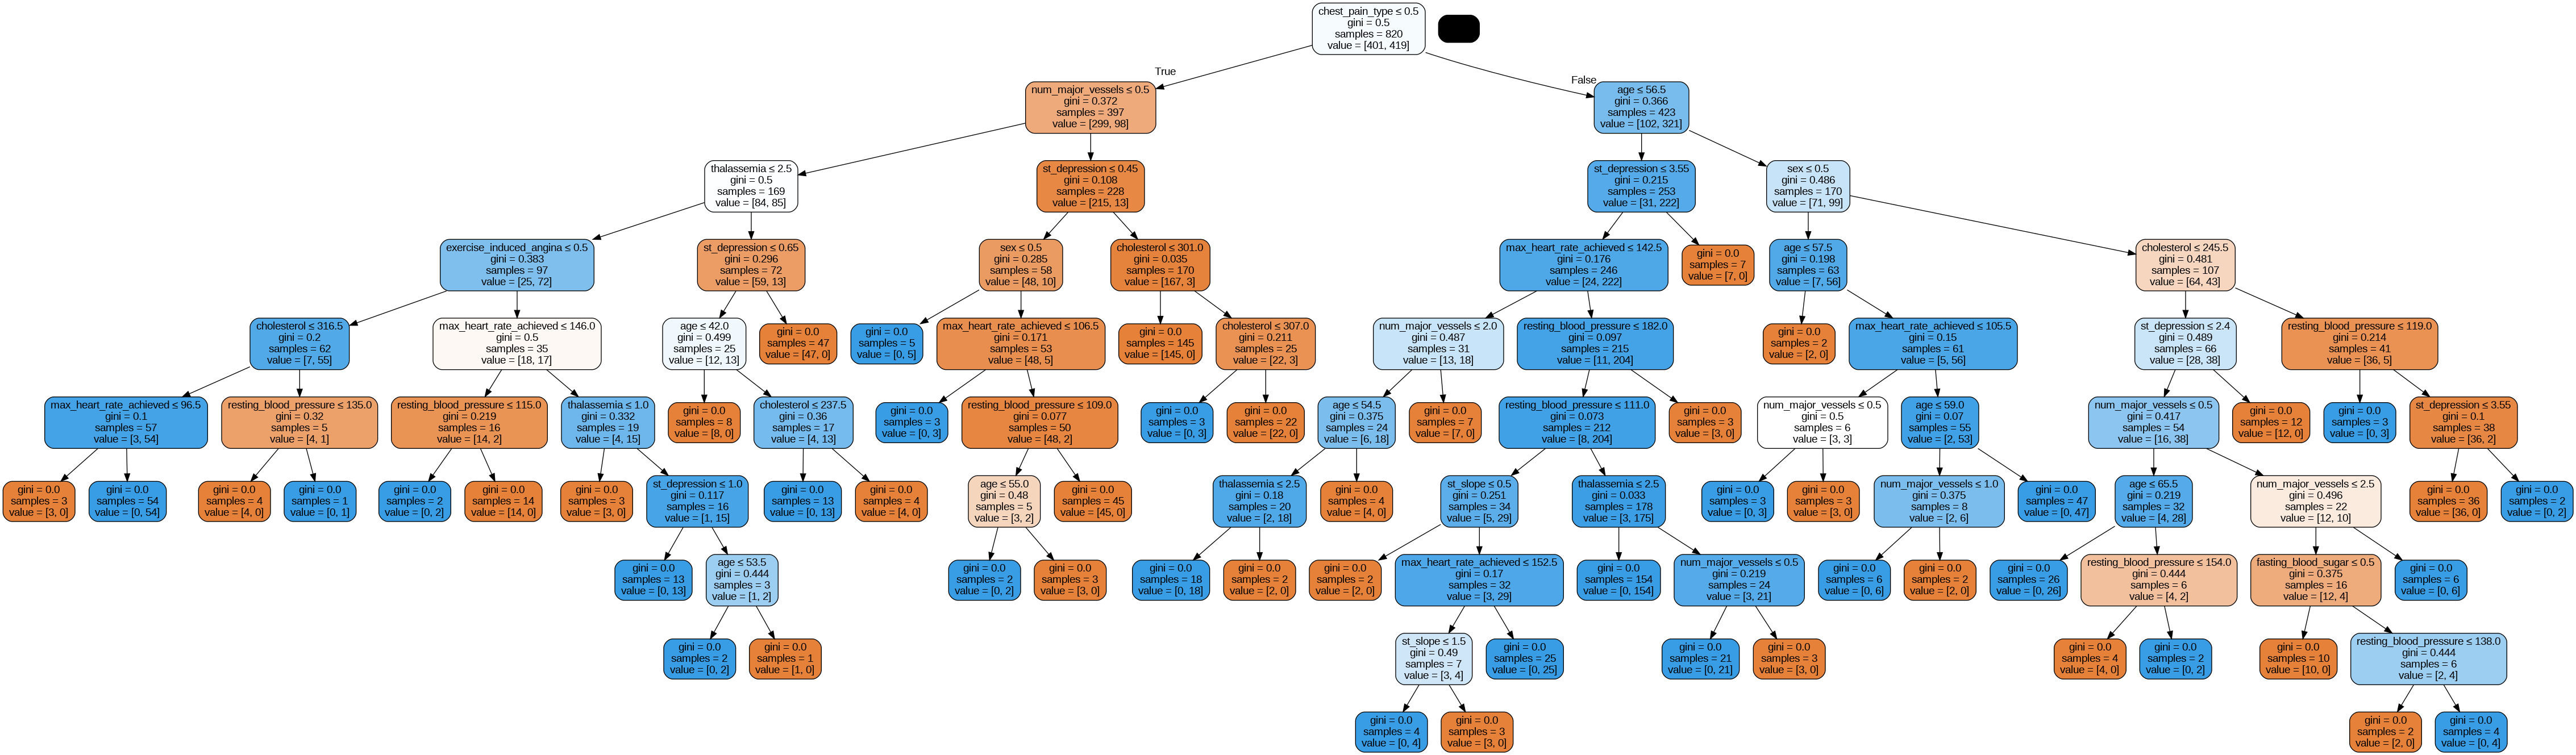

In [ ]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<Axes: >

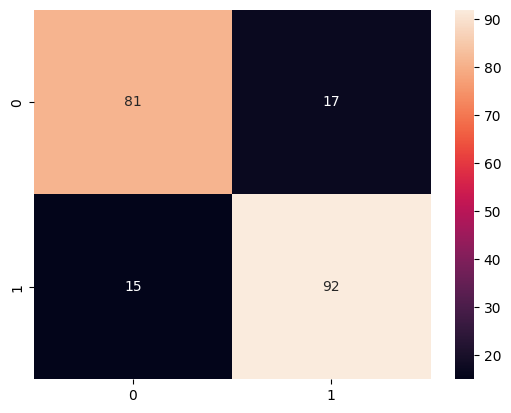

In [ ]:
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision = precision_score(Y_test, y_pred_dt)

In [ ]:
print("Precision: ",precision)

Precision:  0.8440366972477065


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(Y_test, y_pred_dt)

In [ ]:
print("Recall is: ",recall)

Recall is:  0.8598130841121495


In [ ]:
print((2*precision*recall)/(precision+recall))

0.8518518518518519


In [ ]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0    0   1
target        
0       81  17
1       15  92

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

14.018691588785046

In [ ]:
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(),
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)


In [ ]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

accuracy
KNN                  0.736585
Decision Trees       0.843902
Logistic Regression  0.863415
Naive Bayes          0.853659
Random Forests       1.000000

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

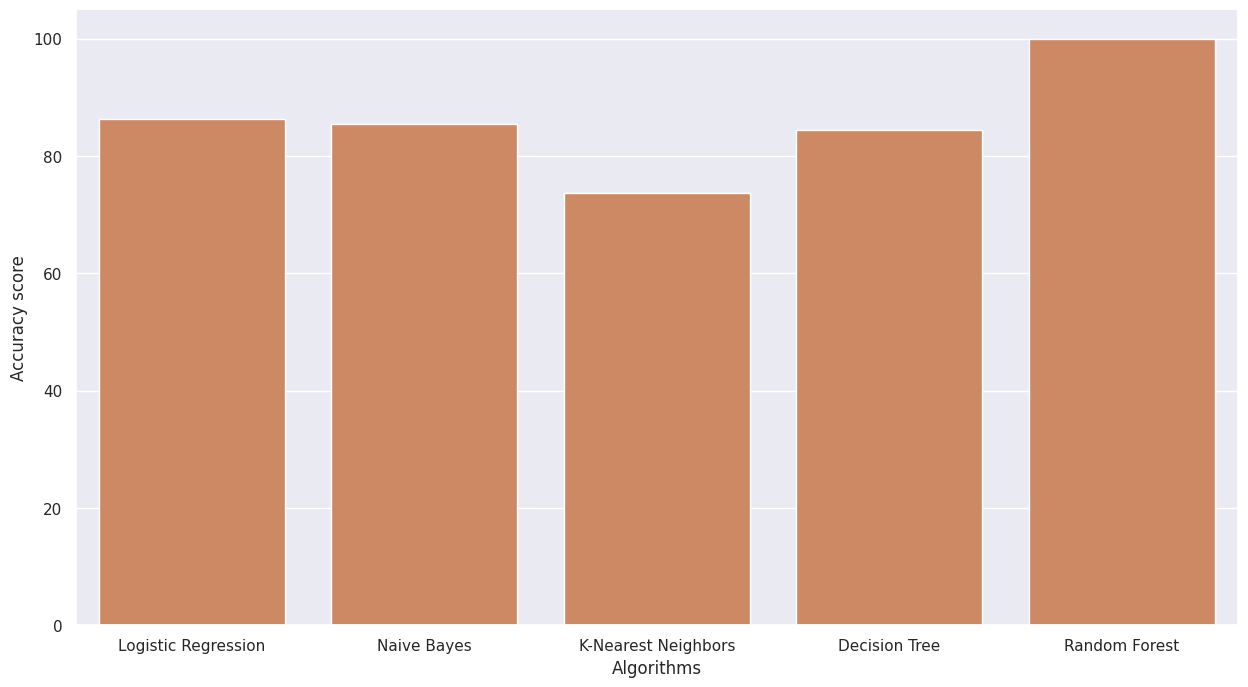

In [ ]:
sns.barplot(x=algorithms, y=scores)
scores = [score_lr, score_nb, score_knn, score_dt, score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms, y=scores)